# Representing graphs for neural networks

**Note that this is the solutions to the first session, for the work notebook go [here](https://drive.google.com/file/d/1-twUhpdFYB66R4o9xu082v3RpR-856JB/view?usp=sharing)**

You can find the online version of this notebook [here](https://drive.google.com/file/d/1-wCLwlv06H1eUvSTAOOkDJeF1wHlZ-44/view?usp=sharing)

In this first section we will look at how to go from an simple graph representation to an input suitable for neural networks.

First we'll look at some basics ways of representing graphs and the differencce between directed and undirected graphs. 

Then we'll go through the adjacency matrix.

In the end we look at graph attributes. We'll discuss how we will have to handle different kind of variables differently and what this means for encoding the graphs for our neural networks.

Try to answer the sections marked as **Question**. The sections marked **Task** has programming task you should perform.

## Representing graphs in code
A graph is generally defined as a pair of sets, a set of nodes and a set of edges between them $G = (N, E)$. To be able to tell nodes apart, we need to assign a unique identifier to each node, which we'll refer to as an index.

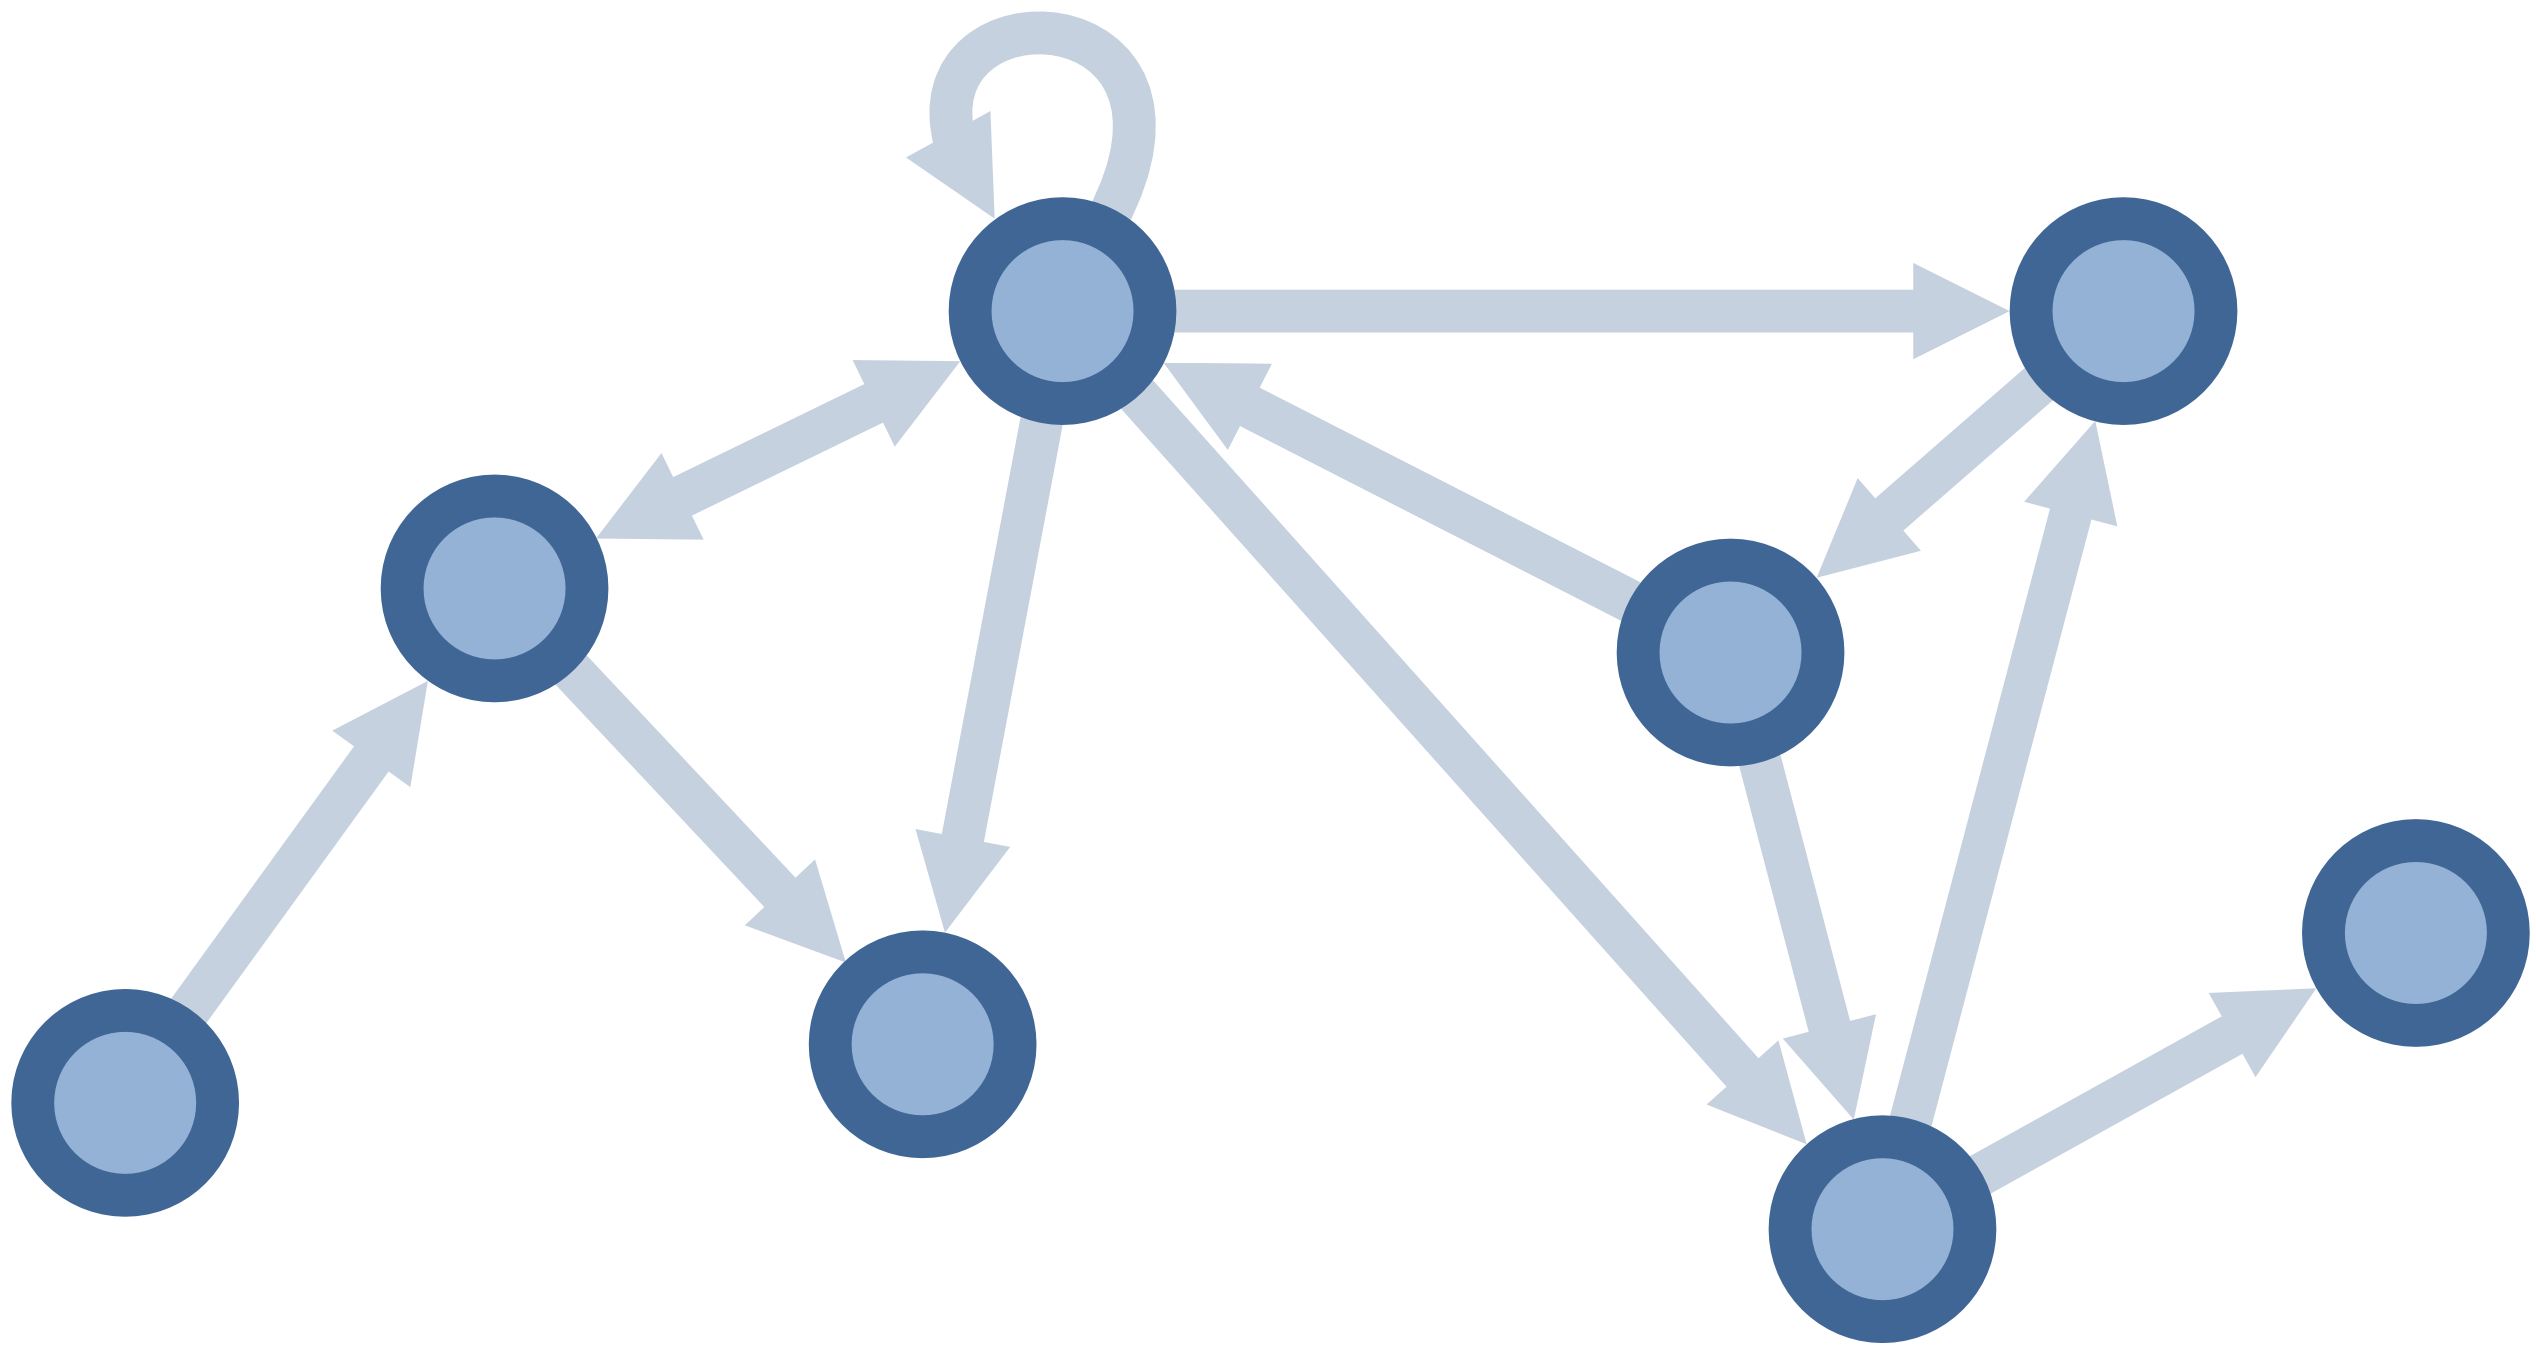

Each edge is defined by the nodes it connects, and is therefore represented as a pair (or tuple) of nodes. If the graph is explicitly undirected, the order of the nodes in the pair is not important, but in a directed graph the edge $(u, v)$ is different from the edge $(v, u)$. A common way of representing graphs is to always assume that it's a directed graph, and to represent undirected graphs by adding the edge in both directions. While this might seem wasteful, it often allows algorithms to be applicable to both directed and undirected graphs without modification.

A simple representation of a directed graph in python can look as follows:

In [ ]:
nodes = {0, 1, 2, 3, 4, 5, 6, 7}
edges = {(0,1), (1,2), (2,1), (1,3), (2,2), (2,3), (2,4), (2,6), (4,5), (5,2), (5,6), (6,4), (6,7)}
graph = (nodes, edges)

print('datatype nodes:', type(nodes), '(',
      len(nodes), 'x',
      type(min(nodes)), ')')
print('datatype edges:', type(edges), '(',
      len(edges), 'x',
      type(min(edges)), '(',
      type(min(edges)[0]), ',',
      type(min(edges)[1]), '))')
print('datatype graphs:', type(graph))

datatype nodes: <class 'set'> ( 8 x <class 'int'> )
datatype edges: <class 'set'> ( 13 x <class 'tuple'> ( <class 'int'> , <class 'int'> ))
datatype graphs: <class 'tuple'>


````{exercise} Question
 Why is there a mismatch in number of edges in the code compared to the figure?
````

````{solution}

One of the edges is directed, so the edge set contains pairs in both directions
````

### Undirected graph and permutation invariance
In the example above, relationships between nodes was not symmetric, so the relationship $(1,2)$ does not imply $(2,1)$. A real world example of this directed graph would be e.g a follower graph on a social network.

In many cases, the relationship _is_ symmetric, so $(1,2)$ _is_ the same as $(2,1)$. We will refer to this property as _permutation invariance_, changing the order of the nodes in the edge of an undirected graph is still the exact same graph.

### Permutation invariance in python
Below is a figure of an undirected graph followed by python code representing this undirected graph

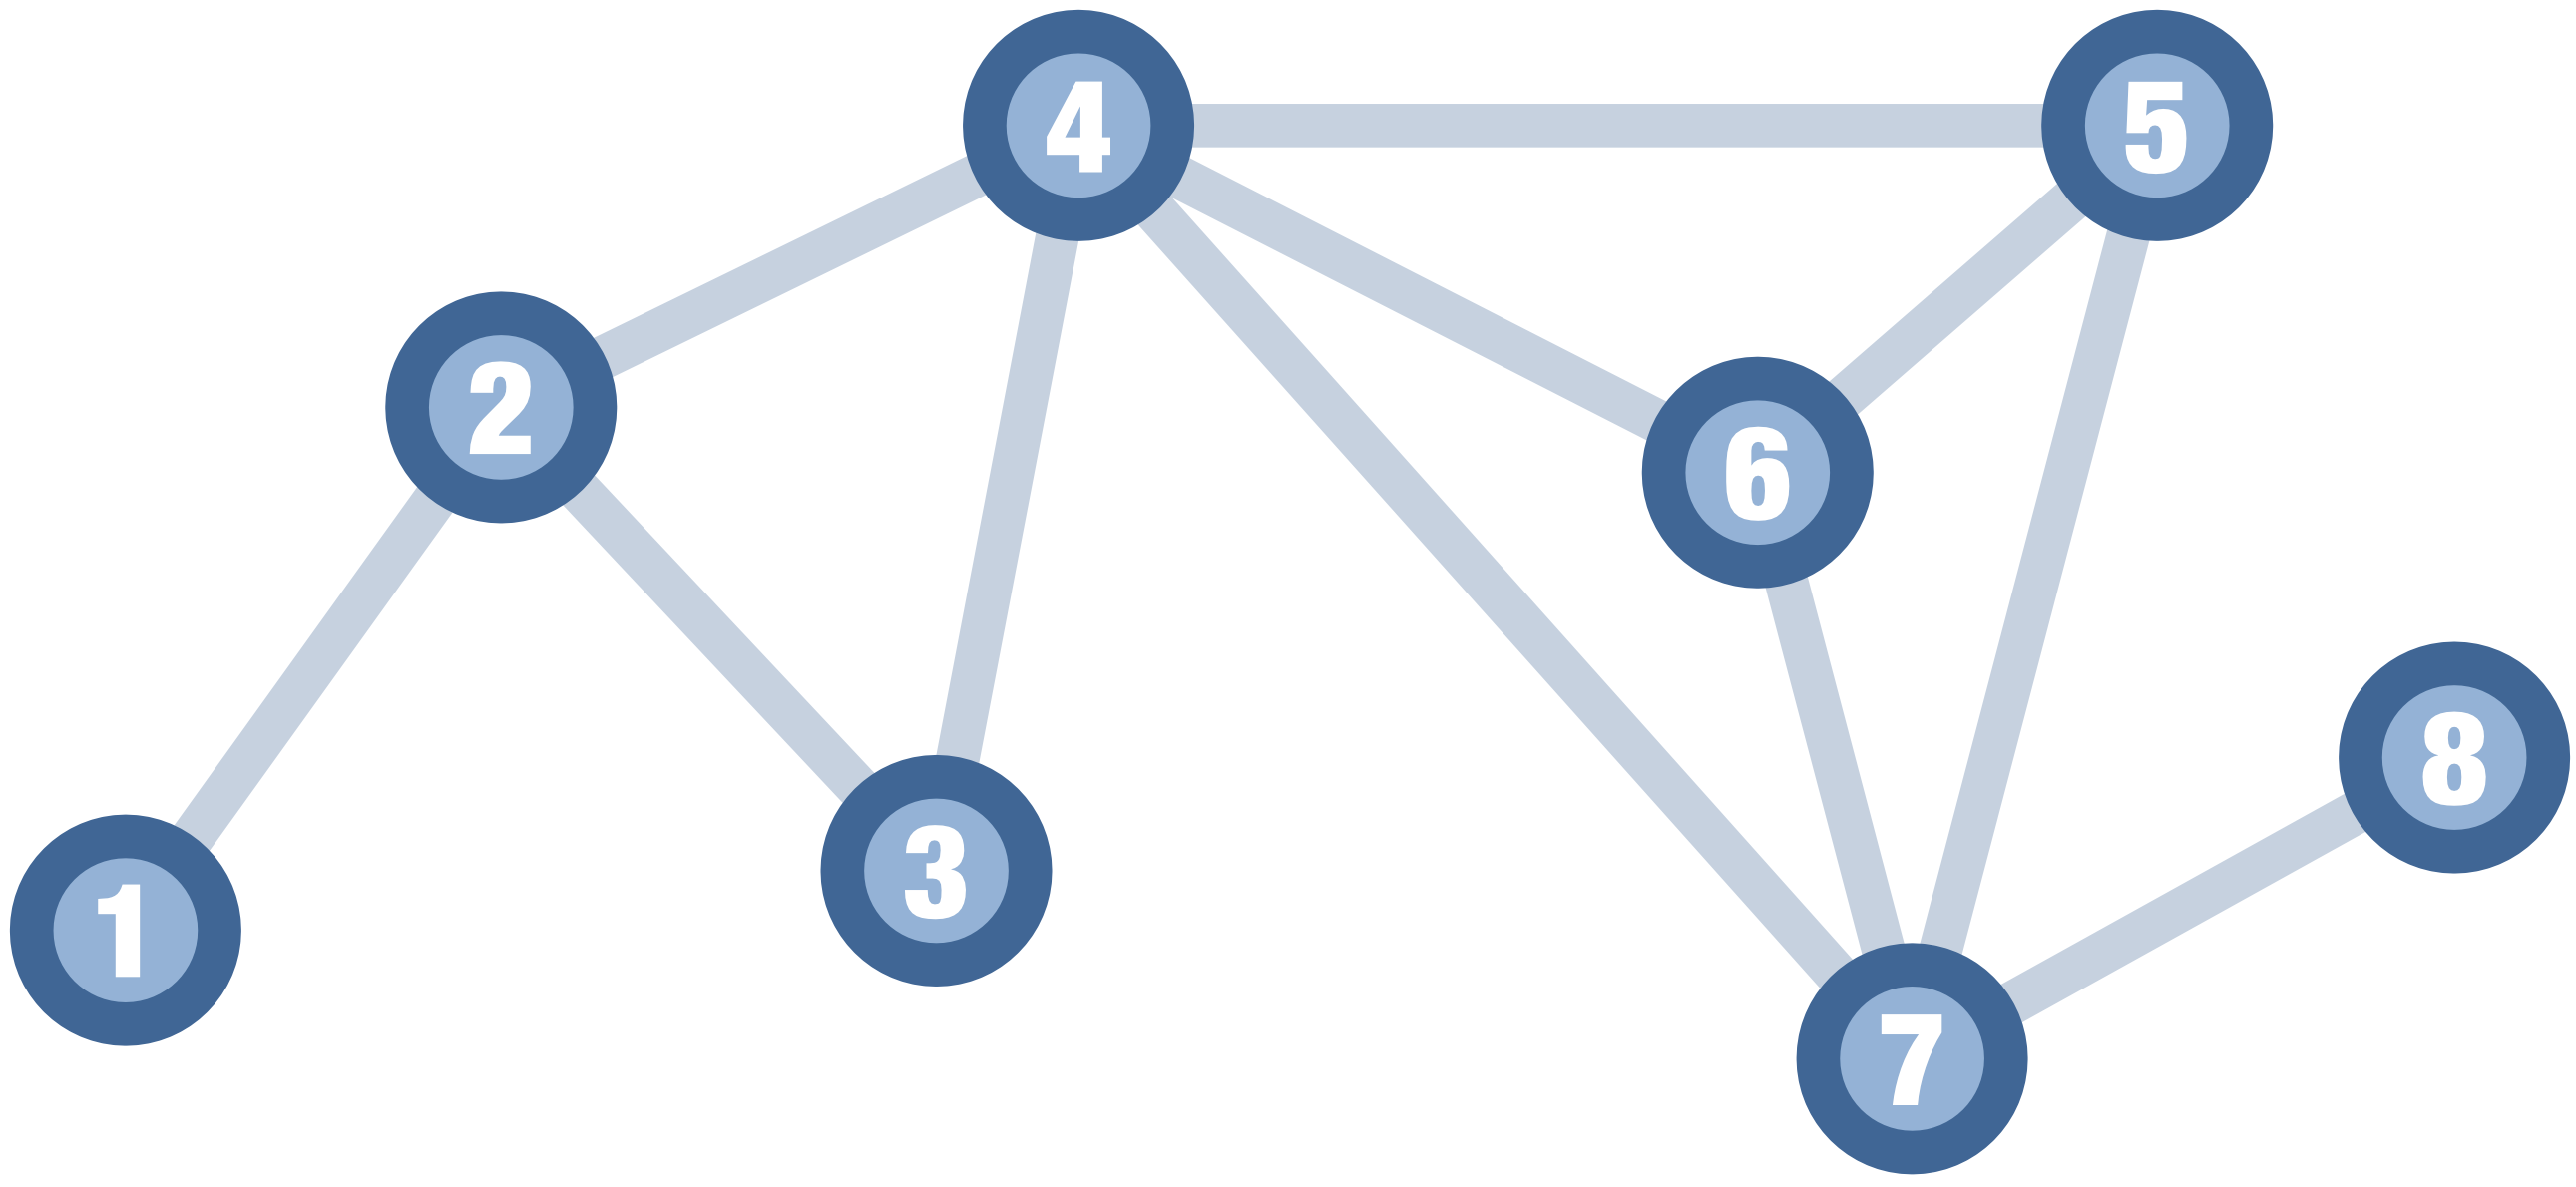

In [ ]:
def compare_graphs(g1, g2):
  nodes_1, edges_1 = g1
  nodes_2, edges_2 = g2
  return nodes_1 == nodes_2 and edges_1 == edges_2

# Lists
nodes_1 = [1, 2, 3, 4, 5, 6, 7, 8]
edges_1 = [(1,2), (2,3), (2,4), (3,4), (4,5), (4,6), (4,7), (5,6), (5,7), (6,7), (7,8)]
g1 = (nodes_1, edges_1)


nodes_2 = [2, 4, 5, 3, 8, 1, 6, 7]
edges_2 = [(2,1), (2,3), (4,2), (3,4), (5,4), (4,6), (4,7), (6,5), (5,7), (7,6), (7,8)]
g2 = (nodes_2, edges_2)

# Sets
nodes_3 = {1, 2, 3, 4, 5, 6, 7, 8}
edges_3 = [{1,2},  {2,3}, {2,4}, {3,4}, {4,5}, {4,6}, {4,7}, {5,6}, {5,7}, {6,7}, {7,8}]
g3 = (nodes_3, edges_3)

nodes_4 = {2, 4, 5, 3, 8, 1, 6, 7}
edges_4 = [{2,1}, {2,3}, {4,2}, {3,4}, {5,4}, {4,6}, {4,7}, {6,5}, {5,7}, {7,6}, {7,8}]
g4 = (nodes_4, edges_4)

# Print
print("Is g1 and g2 the same graph?", compare_graphs(g1, g2))

print("Is g3 and g4 the same graph?", compare_graphs(g3, g4))

Is g1 and g2 the same graph? False
Is g3 and g4 the same graph? True


````{exercise} Question
 Why is the comparison results different for g1 and g2 vs. g3 and g4?
````

````{solution}

The first uses ordered data structures, they only compare equal if their content is in the same order. The second uses sets, which compare equal as long as they both contain the same elements in any order.
````

````{exercise} Question
 How could you represent an undirected graph using lists or tuples for the edges (i.e. ordered datastructures)?
````

````{solution}

Add the pairs in both directions
````

## The Adjacency matrix
We've represented the graph as a list of edges, but another common representation is that of an _adjacency matrix_. Since an edge essentially represents a pairwise relationship, we can encode these relationships in a matrix $A$ of size $\text{number of nodes} \times \text{number of nodes}$, where each element $A_{i,j}$ encodes the relationshop between these nodes. When this matrix encodes the edge relationships, we typically set the positions representing an edge to $1$ and the positions representing pairs without edges to $0$.

**The adjecancy matrix will play a central role in our later discussions on Graph Neural Networks and Transformers.**



### Adjacency matrix of a *directed* graph

Each element encode a non-symmetrical relationship, so how to interpret and write the adjacency matrix is ambiguous. Here we will use the convention that the each row $i$ encodes the *outgoing* edges *from* node $i$, converesly each column $j$ encodes the *incoming* edges *to* node $j$.

As discussed above, we can still represent symmetric relationships between nodes by adding edges in both directions. 

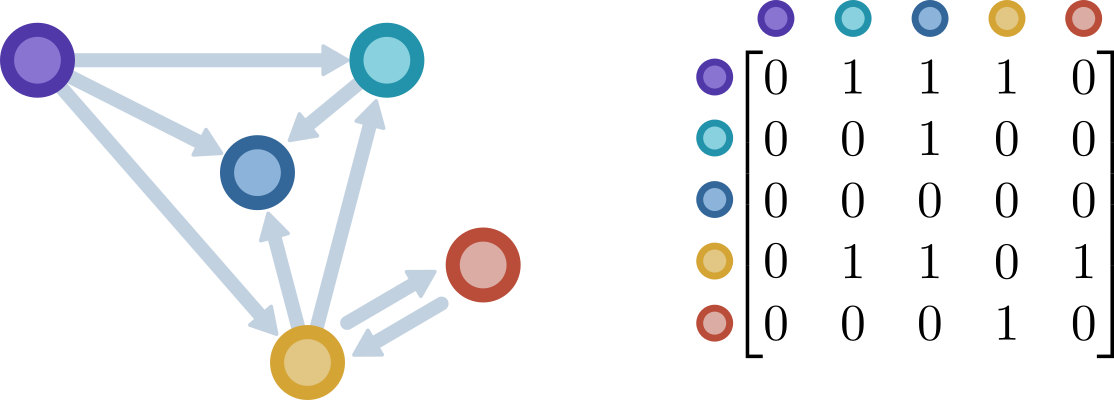

### Adjacency matrix of an undirected graph

In an undirected graph, the adjecency matrix is symmetric since it expresses a symmetric relationship between entitites. That is, the following holds:

$$
A_{ij} = A_{ji}
$$

In this sense, we can think of an undirected graph as a special case of directed graphs, where the adjacency matrix is symmetric. 

By then using the adjacency matrix as the representation for our algorithms (in our Graph Neural Network), **we don't have to implement special cases for undirected graphs**, we just treat all graphs as directed and leave it up to the data loading to create the desired adjacency matrix.

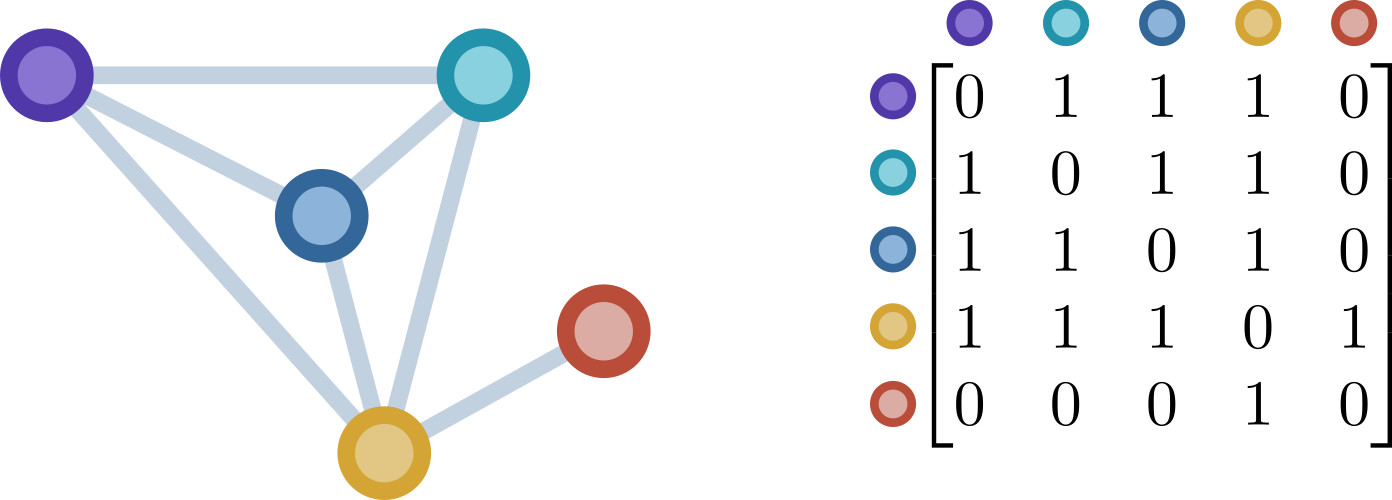

````{exercise} Task
 Fill in the adjacency matrix for the following graph in the text cell below it
````

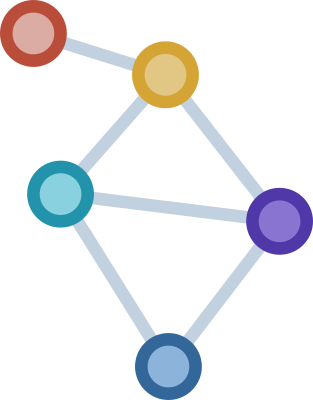

Edit this cell to fill in the adjacency matrix

$$\begin{bmatrix}
0& ?& ?& ?& ?\\
?& 0& ?& ?& ?\\
?& ?& 0& ?& ?\\
?& ?& ?& 0& ?\\
?& ?& ?& ?& 0\\
\end{bmatrix}$$

````{solution}

$$\begin{bmatrix}
0& 1& 0& 0& 0\\
1& 0& 1& 1& 0\\
0& 1& 0& 1& 1\\
0& 1& 1& 0& 1\\
0& 0& 1& 1& 0\\
\end{bmatrix}$$
````

````{exercise} Task
 Fill in the adjacency matrix for the following directed graph in the text cell below it
````

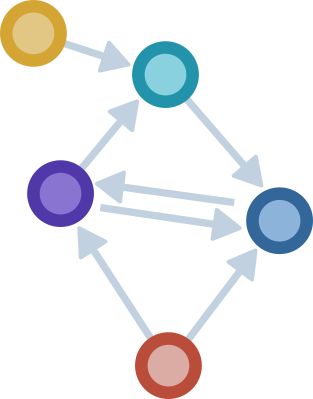

Edit this cell to fill in the adjacency matrix

$$\begin{bmatrix}
0& ?& ?& ?& ?\\
?& 0& ?& ?& ?\\
?& ?& 0& ?& ?\\
?& ?& ?& 0& ?\\
?& ?& ?& ?& 0\\
\end{bmatrix}$$

````{solution}

$$\begin{bmatrix}
0& 1& 0& 0& 0\\
0& 0& 0& 1& 0\\
0& 1& 0& 1& 0\\
0& 0& 1& 0& 0\\
0& 0& 1& 1& 0\\
\end{bmatrix}$$
````

````{exercise} Question
 For each of the graphs above, are their adjacency matrices unique? Why/why not?
````

````{solution}

No, the adjacency matrix is not unique. You needed to decide which row/column corresponded to which node. This mapping from node identity to adjacency matrix index is arbitrary, but we often assign each node some enumerable index which we use to determine the order.
````

````{exercise} Question
 What would a non-zero entry in the diagonal of the adjacency matrix encode, and when would we want to use that?
````

````{solution}

Self-loops would encode some binary relationship from a node to itself. An example could be a graph representation of a finite state machine.
````

````{exercise} Task
 implement the function below which takes a set of edges and produces an adjacency matrix
````

In [ ]:
nodes = {1,2,3,4,5}
edge_set = {(1,2), (2,4), (3,2), (3,4), (4,3), (5,3), (5,4)}

def adjacency_matrix(nodes, edges):
  working_matrix = [[0]*len(nodes) for i in range(len(nodes))]
  # Can you rely on the node labels corresponding to indices?
  # some_code_here
  for edge in edges:
    u, v = edge
    # Set the correct element, can you use *u* and *v* directly?
    # some code here
  return working_matrix

adjacency_matrix(nodes, edge_set)

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

````{solution}

```python
nodes = {1,2,3,4,5}
edge_set = {(1,2), (2,4), (3,2), (3,4), (4,3), (5,3), (5,4)}

def adjacency_matrix(nodes, edges):
  working_matrix = [[0]*len(nodes) for i in range(len(nodes))]
  # Can you rely on the node labels corresponding to indices?
  # some_code_here
  node_to_idx = {node_label: i for i, node_label in enumerate(sorted(nodes))}
  for edge in edges:
    u, v = edge
    # Set the correct element, can you use *u* and *v* directly?
    u_i = node_to_idx[u]
    v_i = node_to_idx[v]
    working_matrix[u_i][v_i] = 1
    # some code here
  return working_matrix

adjacency_matrix(nodes, edge_set)
```
````

## Graph attributes

We've looked at how the structure of a graph can be encoded. In particular the adjacency matrix gives us all the information about the pairwise relationships of a graph.

What about other things which could be useful for our graph learning, such as color of nodes or weights of edges?

Consider the structural formula of caffeine

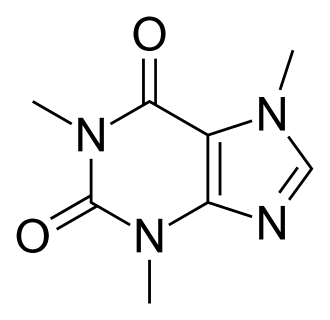

These structural formulas are essentially graphs, but the nodes and edges (atoms and bonds) have attributes associated with them. The nodes (atoms) for example are of different type (e.g. carbon, oxygen, nitrogen) just like the edges (bonds) also are of different type (e.g. single, double or aromatic).

Below is an example of how we might represent the molecule as a graph.


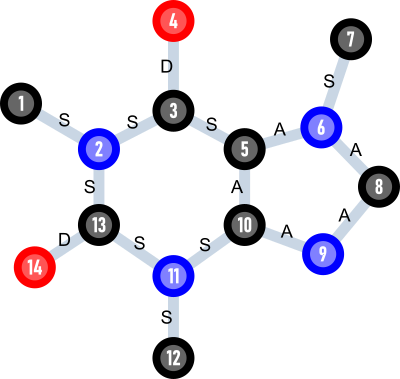

Note that atom type is encoded by colour and bond type by a symbol (S-single, D-double, A-aromatic), while each node has been assigned a unique integer index. To represent this in code, we need to keep track of the atom features (atom type) and bond features (node attributes). We can represent this simply using dictionaries.

In [ ]:
caffein_nodes = {1: {'atom_type': 'C'},
                 2: {'atom_type': 'N'},
                 3: {'atom_type': 'C'},
                 4: {'atom_type': 'O'},
                 5: {'atom_type': 'C'},
                 6: {'atom_type': 'N'},
                 7: {'atom_type': 'C'},
                 8: {'atom_type': 'C'},
                 9: {'atom_type': 'N'},
                 10: {'atom_type': 'C'},
                 11: {'atom_type': 'N'},
                 12: {'atom_type': 'C'},
                 13: {'atom_type': 'C'},
                 14: {'atom_type': 'O'}}

# frozenset is an immutable set which can be used as dictionary keys.
# This way caffeine_edges[frozenset({a,b})] == caffeine_edges[frozenset({b,a})]
# so we don't have to care about the order in which we express the nodes of an 
# edge
caffeine_edges = {frozenset({1,2}): {'bond_type': 'S'},
                  frozenset({2,3}): {'bond_type': 'S'},
                  frozenset({2,13}): {'bond_type': 'S'},
                  frozenset({3,4}): {'bond_type': 'D'},
                  frozenset({3,5}): {'bond_type': 'S'},
                  frozenset({5,6}): {'bond_type': 'A'},
                  frozenset({5,10}): {'bond_type': 'A'},
                  frozenset({6,7}): {'bond_type': 'S'},
                  frozenset({6,8}): {'bond_type': 'A'},
                  frozenset({8,9}): {'bond_type': 'A'},
                  frozenset({9,10}): {'bond_type': 'A'},
                  frozenset({10,11}): {'bond_type': 'S'},
                  frozenset({11,12}): {'bond_type': 'S'},
                  frozenset({11,13}): {'bond_type': 'S'},
                  frozenset({13,14}): {'bond_type': 'D'}}

````{exercise} Task
 Below are three graphs, pick one and encode it using a similar representation as the caffeine example above
````

#### Graph 1



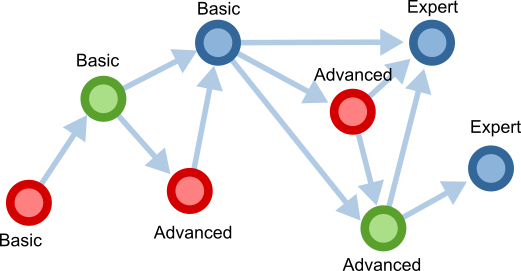

In [ ]:
# Create a graph representation below
challenge_nodes = {...}
challenge_edges = {...}

````{solution}
```python
# Create a graph representation below
challenge_nodes = {1: {'color': 'red', 'level': 'basic'},
                   2: {'color': 'green', 'level': 'basic'},
                   3: {'color': 'red', 'level': 'advanced'},
                   4: {'color': 'blue', 'level': 'basic'},
                   5: {'color': 'red', 'level': 'advanced'},
                   6: {'color': 'blue', 'level': 'expert'},
                   7: {'color': 'green', 'level': 'advanced'},
                   1: {'color': 'blue', 'level': 'expert'}}

# Note that this is a directed graph, so we use tuples to represent the edges
challenge_edges = { (1,2), (2,3), (2,4), (3,4), (4,5), (4,6), (4,7), (5,6), (5,7), (7,6), (7,8)}
```
````

#### Graph 2


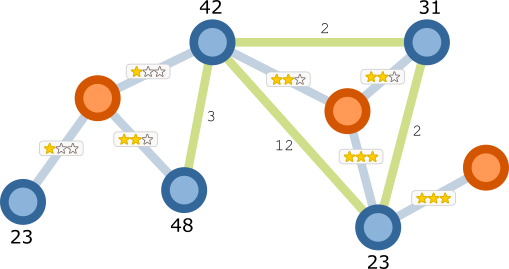

In [ ]:
# Create a graph representation below
review_nodes = {...}
review_edges = {...} 

````{solution}

```python
# Create a graph representation below
review_nodes =  {1: {'color': 'blue', 'weight': 23},
                   2: {'color': 'orange', 'weight': None},
                   3: {'color': 'blue', 'weight': 48},
                   4: {'color': 'blue', 'weight': 42},
                   5: {'color': 'orange', 'weight': None},
                   6: {'color': 'blue', 'weight': 31},
                   7: {'color': 'blue', 'weight': 23},
                   1: {'color': 'orange', 'weight': None}}
review_edges = {frozenset((1,2)): {'rating': 'one', 'color': 'blue', 'weight': None}, 
                frozenset((2,3)): {'rating': 'one', 'color': 'blue', 'weight': None}, 
                frozenset((2,4)): {'rating': 'two', 'color': 'blue', 'weight': None}, 
                frozenset((3,4)): {'rating': None, 'color': 'green', 'weight': 3}, 
                frozenset((4,5)): {'rating': 'two', 'color': 'blue', 'weight': None}, 
                frozenset((4,6)): {'rating': None, 'color': 'green', 'weight': 2}, 
                frozenset((4,7)): {'rating': None, 'color': 'green', 'weight': 12}, 
                frozenset((5,6)): {'rating': 'two', 'color': 'blue', 'weight': None}, 
                frozenset((5,7)): {'rating': 'three', 'color': 'blue', 'weight': None},
                frozenset((6,7)): {'rating': None, 'color': 'green', 'weight': 2}, 
                frozenset((7,8)): {'rating': 'three', 'color': 'blue', 'weight': None}}
```
````

#### Graph 3

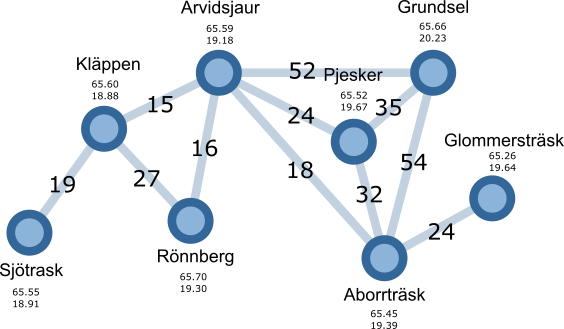

In [ ]:
# Create a graph representation below
review_nodes = {...}
review_edges = {...} 

**Solutions:**
```python
# Create a graph representation below
town_nodes =  {'Stjötrask': {'lat': 65.55, 'lon': 18.91},
               'Kläppen': {'lat': 65.69, 'lon': 18.88},
               'Rönnberg': {'lat': 65.70, 'lon': 19.30},
               'Arvidsjaur': {'lat': 65.59, 'lon': 19.18},
               'Pjesker': {'lat': 65.52, 'lon': 19.67},
               'Grundsel': {'lat': 65.66, 'lon': 20.23},
               'Aborrträsk': {'lat': 65.45, 'lon': 19.39},
               'Glommersträsk': {'lat': 65.26, 'lon': 19.64}}
town_edges = {frozenset(('Stjötrask','Kläppen')): {'distance': 19}, 
                frozenset(('Kläppen','Rönnberg')): {'distance': 15}, 
                frozenset(('Kläppen','Arvidsjaur')): {'distance': 27}, 
                frozenset(('Rönnberg','Arvidsjaur')): {'distance': 16}, 
                frozenset(('Arvidsjaur','Pjesker')): {'distance': 52}, 
                frozenset(('Arvidsjaur','Grundsel')): {'distance': 24}, 
                frozenset(('Arvidsjaur','Aborrträsk')): {'distance': 18}, 
                frozenset(('Pjesker','Grundsel')): {'distance': 35}, 
                frozenset(('Pjesker','Aborrträsk')): {'distance': 32},
                frozenset(('Grundsel','Aborrträsk')): {'distance': 54}, 
                frozenset(('Aborrträsk','Glommersträsk')): {'distance': 24}}
```

## From dictionaries to tensors
The dictionary representation we use above is straight forward and works well for encoding the graphs in python code, but not suitable for inputs to neural networks. 

In a neural network we want to represent everything as vectors or multi-dimensional arrays. This means we have to _encode_ our graph information. 

In the deep learning field, these multi-dimensional arrays are often referred to as _tensors_, but without the semantics a mathematician or physicist might associate with the term.



### The graph structure
We have already seen how the structure of the graph (the edges) can be readily represented by an adjacency matrix, and this format will suit us well when we implement our graph neural network. 



### Node and edge attributes
We've seen above how nodes and edges can have attributes of different kind. For the purpose of a neural network there is two main attribute types we need to keep separate: _discrete_ and _continuous_.



#### Continuous variable
Continuous variables are numerical and can take any value in some range (e.g. negative to positive infinity). For neural networks we typically just use them as they are (perhaps performing some standardization pre-processing). If we have multiple continuous variables we _concatenate_ them.


#### Discrete variables
A discrete variable takes a value (referred to as _level_) from a finite set, in the examples above we saw colour, atom type, bond type, experience and ratings, etc. In neural networks we have to treat _categorical_ variables in a special way, these are discrete variables which are not ordinal (can't be compared with inequalities). We represent them using _embeddings_, dense numerical vectors of high dimension (>100). Each _level_ of the categorical variable is associated with its own distinct vector, it's _embedding_.

These embeddings are almost always _learned parameters_, just like the weights of our neural networks, and should be considered part of the model.

In neural network frameworks such as pytorch, a requirement for this is that we know beforehand how many levels of the variable there are, so that we can create this mapping.

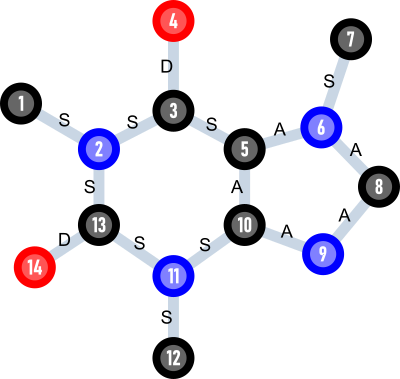

In [ ]:
ATOM_TYPES = {'C': 0, 'N': 1, 'O': 2}
BOND_TYPES = {'S': 0, 'D': 1, 'A': 2}

sym_caffeine_nodes = {1: {'atom_type': 'C'},
                 2: {'atom_type': 'N'},
                 3: {'atom_type': 'C'},
                 4: {'atom_type': 'O'},
                 5: {'atom_type': 'C'},
                 6: {'atom_type': 'N'},
                 7: {'atom_type': 'C'},
                 8: {'atom_type': 'C'},
                 9: {'atom_type': 'N'},
                 10: {'atom_type': 'C'},
                 11: {'atom_type': 'N'},
                 12: {'atom_type': 'C'},
                 13: {'atom_type': 'C'},
                 14: {'atom_type': 'O'}}

enc_caffeine_nodes = {}
for node_idx, node_attributes in sym_caffeine_nodes.items():
  sym_atom_type = node_attributes['atom_type']
  encoded_atom_type = ATOM_TYPES[sym_atom_type]
  enc_caffeine_nodes[node_idx] = {'atom_type': encoded_atom_type}

# frozenset is an immutable set which can be used as dictionary keys.
# This way caffeine_edges[frozenset({a,b})] == caffeine_edges[frozenset({b,a})]
# so we don't have to care about the order in which we express the nodes of an 
# edge
sym_caffeine_edges = {frozenset({1,2}): {'bond_type': 'S'},
                  frozenset({2,3}): {'bond_type': 'S'},
                  frozenset({2,13}): {'bond_type': 'S'},
                  frozenset({3,4}): {'bond_type': 'D'},
                  frozenset({3,5}): {'bond_type': 'S'},
                  frozenset({5,6}): {'bond_type': 'A'},
                  frozenset({5,10}): {'bond_type': 'A'},
                  frozenset({6,7}): {'bond_type': 'S'},
                  frozenset({6,8}): {'bond_type': 'A'},
                  frozenset({8,9}): {'bond_type': 'A'},
                  frozenset({9,10}): {'bond_type': 'A'},
                  frozenset({10,11}): {'bond_type': 'S'},
                  frozenset({11,12}): {'bond_type': 'S'},
                  frozenset({11,13}): {'bond_type': 'S'},
                  frozenset({13,14}): {'bond_type': 'D'}}

enc_caffeine_edges = {}
for edge, edge_attributes in sym_caffeine_edges.items():
  sym_bond_type = edge_attributes['bond_type']
  encoded_bond_type = BOND_TYPES[sym_bond_type]
  enc_caffeine_edges[edge] = {'bond_type': encoded_bond_type}

(enc_caffeine_nodes, enc_caffeine_edges)

({1: {'atom_type': 0},
  2: {'atom_type': 1},
  3: {'atom_type': 0},
  4: {'atom_type': 2},
  5: {'atom_type': 0},
  6: {'atom_type': 1},
  7: {'atom_type': 0},
  8: {'atom_type': 0},
  9: {'atom_type': 1},
  10: {'atom_type': 0},
  11: {'atom_type': 1},
  12: {'atom_type': 0},
  13: {'atom_type': 0},
  14: {'atom_type': 2}},
 {frozenset({1, 2}): {'bond_type': 0},
  frozenset({2, 3}): {'bond_type': 0},
  frozenset({2, 13}): {'bond_type': 0},
  frozenset({3, 4}): {'bond_type': 1},
  frozenset({3, 5}): {'bond_type': 0},
  frozenset({5, 6}): {'bond_type': 2},
  frozenset({5, 10}): {'bond_type': 2},
  frozenset({6, 7}): {'bond_type': 0},
  frozenset({6, 8}): {'bond_type': 2},
  frozenset({8, 9}): {'bond_type': 2},
  frozenset({9, 10}): {'bond_type': 2},
  frozenset({10, 11}): {'bond_type': 0},
  frozenset({11, 12}): {'bond_type': 0},
  frozenset({11, 13}): {'bond_type': 0},
  frozenset({13, 14}): {'bond_type': 1}})

````{exercise} Task
 Extend the code example below to encode the following molecule
````
Look at the code example above, what do you need to change to make it work?

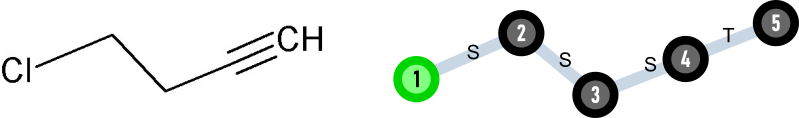

In [ ]:
ATOM_TYPES = {'C': 0, 'N': 1, 'O': 2} 
BOND_TYPES = {'S': 0, 'D': 1, 'A': 2}

sym_4cloro1butino_nodes = {1: ...}

enc_4cloro1butino_nodes = {}
for node_idx, node_attributes in sym_4cloro1butino_nodes.items():
  sym_atom_type = node_attributes['atom_type']
  encoded_atom_type = ATOM_TYPES[sym_atom_type]
  enc_4cloro1butino_nodes[node_idx] = {'atom_type': encoded_atom_type}

sym_4cloro1butino_edges = {frozenset({1,2}): ...}

enc_4cloro1butino_edges = {}
for edge, edge_attributes in sym_4cloro1butino_edges.items():
  sym_bond_type = edge_attributes['bond_type']
  encoded_bond_type = BOND_TYPES[sym_bond_type]
  enc_4cloro1butino_edges[edge] = {'bond_type': encoded_bond_type}

(enc_4cloro1butino_nodes, enc_4cloro1butino_edges)

````{solution}
```python
ATOM_TYPES = {'C': 0, 'N': 1, 'O': 2, 'Cl': 3} 
BOND_TYPES = {'S': 0, 'D': 1, 'A': 2, 'T': 3}

sym_4cloro1butino_nodes = {1: {'atom_type': 'Cl'},
                           2: {'atom_type': 'C'},
                           3: {'atom_type': 'C'},
                           4: {'atom_type': 'C'},
                           5: {'atom_type': 'C'},}

enc_4cloro1butino_nodes = {}
for node_idx, node_attributes in sym_4cloro1butino_nodes.items():
  sym_atom_type = node_attributes['atom_type']
  encoded_atom_type = ATOM_TYPES[sym_atom_type]
  enc_4cloro1butino_nodes[node_idx] = {'atom_type': encoded_atom_type}

sym_4cloro1butino_edges = {frozenset({1,2}): {'bond_type': 'S'},
                           frozenset({2,3}): {'bond_type': 'S'},
                           frozenset({3,4}): {'bond_type': 'S'},
                           frozenset({4,5}): {'bond_type': 'T'},}

enc_4cloro1butino_edges = {}
for edge, edge_attributes in sym_4cloro1butino_edges.items():
  sym_bond_type = edge_attributes['bond_type']
  encoded_bond_type = BOND_TYPES[sym_bond_type]
  enc_4cloro1butino_edges[edge] = {'bond_type': encoded_bond_type}

(enc_4cloro1butino_nodes, enc_4cloro1butino_edges)
```
````

### Embeddings
We've now _encoded_ the categorical values, we've translated them to the universal language of integers. Treating them as just numerical values and inputting them to a neural network layer _as is_ would make learning hard. It would tell the neural network that levels encoded to similar values are similar, which often is wrong.

Instead, we associate each integer value with a numerical vector: an _embedding_.

**note: it is often taught that categorical values should be represented by  one-hot vectors. For contemporary neural network frameworks this is bad practice. Encode them as integers and use embedding layers.**

#### Why not use one-hot vectors in neural networks
The most important reason to not use one-hot vectors is computational efficiency. If you encode a variable as one hot, e.g.:

$$\mathbf{x} = \begin{bmatrix}0\\0\\1\end{bmatrix}$$

This will typically be multiplied with a weight matrix is the first layer of the neural network:

$$ \mathbf{z} = 
\begin{bmatrix}w_{11}&w_{12}&w_{13}\\w_{21}&w_{22}&w_{23}\\w_{31}&w_{32}&w_{33}\end{bmatrix} 
\begin{bmatrix}0\\0\\1\end{bmatrix} = 
\begin{bmatrix}0w_{11} + 0w_{12} +1w_{13}\\0w_{21} + 0w_{22} +1w_{23}\\0w_{31} + 0w_{32} +1w_{33}\end{bmatrix} = 
\begin{bmatrix}w_{13}\\w_{23}\\w_{33}\end{bmatrix} $$


So as you can see you waste a lot of computation by multiplying with zeroes. This might also have unintended consequences if you give this one-hot input to e.g. an LSTM. 

There's a more subtle issues where optimizers will keep running averages of the gradients of weight matrices, in which case using one-hot vectors will make this running averages very low. 

**note that this is primarily an issue for neural networks, in other learning algorithm, using one-hot encodings might be proper**


### Roll our own embeddings
To get a sense of how embedding might work, we'll start by creating our own. Later we will use the `torch.nn.Embedding` module instead. In our home-made embeddings, we just create a matrix of as many rows as there are levels of our categorical variable, and as many columns as we'd like. The rows will be called `num_embeddings` since they tell us how many distinct embedding vectors there are. The columns is `embedding_dim` a hyper parameter similar to the size of a neural network layer, the higher, the more capacity our embedding layer will have.

In [ ]:
import torch

In [ ]:
enc_caffeine_nodes

{1: {'atom_type': 0},
 2: {'atom_type': 1},
 3: {'atom_type': 0},
 4: {'atom_type': 2},
 5: {'atom_type': 0},
 6: {'atom_type': 1},
 7: {'atom_type': 0},
 8: {'atom_type': 0},
 9: {'atom_type': 1},
 10: {'atom_type': 0},
 11: {'atom_type': 1},
 12: {'atom_type': 0},
 13: {'atom_type': 0},
 14: {'atom_type': 2}}

In [ ]:
num_embeddings = len(ATOM_TYPES)
embedding_dim = 16  # This is a hyper parameter
ATOM_TYPE_EMBEDDINGS = torch.randn((num_embeddings, embedding_dim))
ATOM_TYPE_EMBEDDINGS

tensor([[-1.9557e+00, -3.0766e-01, -1.1183e+00, -1.0709e-01, -6.2586e-01,
         -2.4403e-02, -1.5390e-01,  4.4363e-01,  7.2527e-01, -6.6036e-01,
         -1.2543e+00, -7.9678e-01,  6.3781e-01,  3.6635e-01, -9.6921e-04,
          1.2905e+00],
        [-5.7185e-01, -5.1884e-01,  4.0006e-01, -4.1145e-01,  8.8736e-01,
          6.4874e-01, -2.2791e-01,  8.3083e-01, -7.5394e-01,  1.4850e+00,
          2.4028e-01,  1.9794e+00,  1.2939e+00,  2.7531e-01,  8.6376e-01,
         -2.0917e+00],
        [ 5.8195e-01,  5.0873e-01, -3.6909e-02, -5.4094e-01, -2.5217e-01,
          3.5244e-01, -1.0684e+00, -1.8896e-01,  5.3201e-01, -9.4611e-01,
          6.3146e-02, -3.4149e-01, -5.0963e-01,  1.0998e-02, -3.8302e-01,
         -3.3505e-01],
        [ 1.1064e+00, -7.5358e-01, -1.4554e+00, -6.6859e-01, -1.1973e-01,
          2.2355e-01,  1.2173e+00, -3.7955e-01,  1.5446e+00,  6.2869e-01,
         -5.3148e-01,  1.4514e+00, -6.6687e-01, -8.0715e-01, -1.1368e+00,
          2.2249e-01]])

In [ ]:
embedded_caffeine_nodes = {}
for node_idx, encoded_node_features in enc_caffeine_nodes.items():
  encoded_atom_type = encoded_node_features['atom_type']
  embedded_atom_type = ATOM_TYPE_EMBEDDINGS[encoded_atom_type]  # What do you think this does?
  embedded_node_features = {'atom_type': embedded_atom_type}
  embedded_caffeine_nodes[node_idx] = embedded_node_features

````{exercise} Question
 in the embedding code block above, what does the line with a comment do?
````

````{solution}

This is just in indexing. We use the integer index encoding a categorical level to pick out a row from our embedding matrix.
````

````{exercise} Task
 Embed the edge features like we did with the node features above
````

In [ ]:
enc_caffeine_edges

{frozenset({1, 2}): {'bond_type': 0},
 frozenset({2, 3}): {'bond_type': 0},
 frozenset({2, 13}): {'bond_type': 0},
 frozenset({3, 4}): {'bond_type': 1},
 frozenset({3, 5}): {'bond_type': 0},
 frozenset({5, 6}): {'bond_type': 2},
 frozenset({5, 10}): {'bond_type': 2},
 frozenset({6, 7}): {'bond_type': 0},
 frozenset({6, 8}): {'bond_type': 2},
 frozenset({8, 9}): {'bond_type': 2},
 frozenset({9, 10}): {'bond_type': 2},
 frozenset({10, 11}): {'bond_type': 0},
 frozenset({11, 12}): {'bond_type': 0},
 frozenset({11, 13}): {'bond_type': 0},
 frozenset({13, 14}): {'bond_type': 1}}

In [ ]:
num_embeddings = len(BOND_TYPES)
embedding_dim = 16  # This is a hyper parameter, you can set it to whatever value you like (though 1 will work poorly)
BOND_TYPE_EMBEDDINGS = torch.randn((num_embeddings, embedding_dim))
BOND_TYPE_EMBEDDINGS

tensor([[ 0.6888,  1.2198,  0.1651, -0.8976,  2.6011,  0.0096, -0.6812,  0.6651,
         -1.6888, -0.5406, -0.2521,  0.0467, -0.9768,  1.2464,  1.1707,  1.5525],
        [ 0.3349,  1.6689, -0.7345, -1.0151, -1.8052, -0.5993, -1.4769, -1.1748,
          0.7113,  0.8316, -1.1749,  0.3661, -0.4436,  1.0846,  1.5738,  0.5577],
        [-0.0687, -0.1815,  1.8127,  0.4427, -0.7503, -1.4079,  0.5750, -0.4242,
          0.0093,  2.4176,  0.0122, -0.2355, -0.8988,  0.4192,  1.7714,  1.5237],
        [-0.2996,  0.1941,  0.3291,  1.6584, -0.4706,  0.6311, -0.7083,  2.6496,
          0.6587,  1.2228,  1.2538,  0.8047,  2.2131, -0.5899, -1.2538,  2.2546]])

In [ ]:
embedded_caffeine_edges = {}
for edge_idx, encoded_edge_features in enc_caffeine_edges.items():
  # your code here, the embedded feature should be assigned to the variable embedded_edge_features
  embedded_caffeine_edges[edge_idx] = embedded_edge_features

````{solution}

```python
embedded_caffeine_edges = {}
for edge_idx, encoded_edge_features in enc_caffeine_edges.items():
  encoded_atom_type = encoded_edge_features['bond_type']
  embedded_atom_type = BOND_TYPE_EMBEDDINGS[encoded_atom_type]
  embedded_edge_features = {'bond_type': embedded_atom_type}
  embedded_caffeine_edges[edge_idx] = embedded_edge_features
```
````

### Creating tensors
Now that we've seen how we can go from symbolic values to integer codes to embeddings, we need to convert our graph into a form suitable for a neural network. 
The operations we use in PyTorch assumes the inputs are n-dimensional arrays (referred to as _tensors_ in this context) and we need to put our features into such a shape.

#### Node features

The simplest way to do this for the node features is to just stack the embeddings for a categorical variable. We will no longer use explicit information about what node label is associated with what row of our feature matrix. If this information is needed, we need to keep track of that separately. For now if we just make sure that we use the same order here as in the edge features things will work out fine.

In [ ]:
caffeine_node_features_stack = dict()
for node_idx, embedded_features in sorted(embedded_caffeine_nodes.items()):  
  for variable_name, embedding in embedded_features.items():
    # Using a defaultdict(list) is neater here, but this should be more familiar
    if variable_name not in caffeine_node_features_stack:
      caffeine_node_features_stack[variable_name] = []
    caffeine_node_features_stack[variable_name].append(embedding)

# Now we've gathered the embeddings and we'll stack them to create our features
stacked_node_features = dict()
for variable_name, stack in caffeine_node_features_stack.items():  
  feature_tensor = torch.stack(stack)
  stacked_node_features[variable_name] = feature_tensor

stacked_node_features


{'atom_type': tensor([[-1.9557e+00, -3.0766e-01, -1.1183e+00, -1.0709e-01, -6.2586e-01,
          -2.4403e-02, -1.5390e-01,  4.4363e-01,  7.2527e-01, -6.6036e-01,
          -1.2543e+00, -7.9678e-01,  6.3781e-01,  3.6635e-01, -9.6921e-04,
           1.2905e+00],
         [-5.7185e-01, -5.1884e-01,  4.0006e-01, -4.1145e-01,  8.8736e-01,
           6.4874e-01, -2.2791e-01,  8.3083e-01, -7.5394e-01,  1.4850e+00,
           2.4028e-01,  1.9794e+00,  1.2939e+00,  2.7531e-01,  8.6376e-01,
          -2.0917e+00],
         [-1.9557e+00, -3.0766e-01, -1.1183e+00, -1.0709e-01, -6.2586e-01,
          -2.4403e-02, -1.5390e-01,  4.4363e-01,  7.2527e-01, -6.6036e-01,
          -1.2543e+00, -7.9678e-01,  6.3781e-01,  3.6635e-01, -9.6921e-04,
           1.2905e+00],
         [ 5.8195e-01,  5.0873e-01, -3.6909e-02, -5.4094e-01, -2.5217e-01,
           3.5244e-01, -1.0684e+00, -1.8896e-01,  5.3201e-01, -9.4611e-01,
           6.3146e-02, -3.4149e-01, -5.0963e-01,  1.0998e-02, -3.8302e-01,
          -3.35

#### Change order of operations
We now have a node feature matrix which is very well suited for input to our nerual network, but we performed a lot of simple operations to get there. Most of our python-based frameworks prefer it if we do multiple things in paralell, and going from integer codes to embeddings is a great example of that.

In [ ]:
enc_caffeine_nodes_stack = {'atom_type': []}
for node_idx, node_attributes in sym_caffeine_nodes.items():
  sym_atom_type = node_attributes['atom_type']
  encoded_atom_type = ATOM_TYPES[sym_atom_type]
  enc_caffeine_nodes_stack['atom_type'].append(encoded_atom_type)
enc_caffeine_nodes_stack


{'atom_type': [0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2]}

In [ ]:
emb_caffeine_nodes_stack = {}
for variable_name, encoded_stack in enc_caffeine_nodes_stack.items():
  enc_tensor = torch.tensor(encoded_stack, dtype=torch.long) # It's important to have a long type here for later
  emb_tensor = ATOM_TYPE_EMBEDDINGS[enc_tensor]  # We can just use the vector to index the rows, nothing more fancy is necessary
  emb_caffeine_nodes_stack[variable_name] = emb_tensor
emb_caffeine_nodes_stack

{'atom_type': tensor([[-1.9557e+00, -3.0766e-01, -1.1183e+00, -1.0709e-01, -6.2586e-01,
          -2.4403e-02, -1.5390e-01,  4.4363e-01,  7.2527e-01, -6.6036e-01,
          -1.2543e+00, -7.9678e-01,  6.3781e-01,  3.6635e-01, -9.6921e-04,
           1.2905e+00],
         [-5.7185e-01, -5.1884e-01,  4.0006e-01, -4.1145e-01,  8.8736e-01,
           6.4874e-01, -2.2791e-01,  8.3083e-01, -7.5394e-01,  1.4850e+00,
           2.4028e-01,  1.9794e+00,  1.2939e+00,  2.7531e-01,  8.6376e-01,
          -2.0917e+00],
         [-1.9557e+00, -3.0766e-01, -1.1183e+00, -1.0709e-01, -6.2586e-01,
          -2.4403e-02, -1.5390e-01,  4.4363e-01,  7.2527e-01, -6.6036e-01,
          -1.2543e+00, -7.9678e-01,  6.3781e-01,  3.6635e-01, -9.6921e-04,
           1.2905e+00],
         [ 5.8195e-01,  5.0873e-01, -3.6909e-02, -5.4094e-01, -2.5217e-01,
           3.5244e-01, -1.0684e+00, -1.8896e-01,  5.3201e-01, -9.4611e-01,
           6.3146e-02, -3.4149e-01, -5.0963e-01,  1.0998e-02, -3.8302e-01,
          -3.35

You now have implemented the operation below. Each node is associated with a feature vector which is stacked into a 2d array.

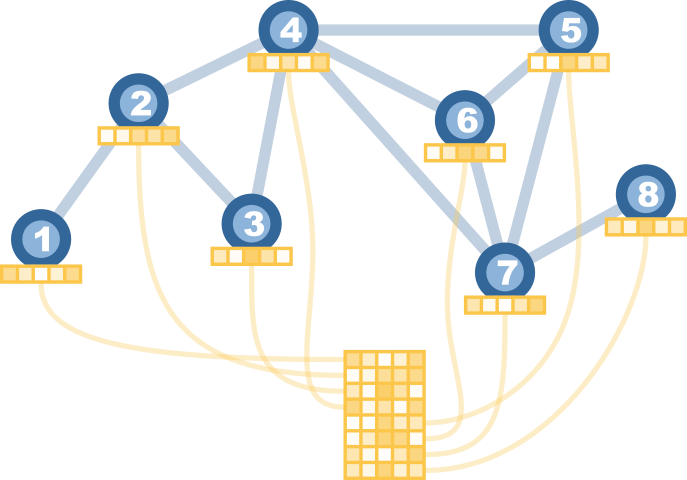

#### Edge features

The node features are straight forward, since we can just stack the vectors according to the order of the node labels.

For the edge features is a bit more complicated, we can't just do away with the pairwise information. There are two ways of dealing with this, either keep the information about what nodes the edge correspond to in a separate tensor, and the feature vector in a similar tensor as for the node features.

The other option is to use the same strategy as for the adjacency matrix: encode all pairwise relationships with a "matrix", but where each element of this "matrix" is actually a feature vector, so it's actually a 3d array.

So if we have the edges between nodes $i,j$ with features $\mathbf{h}_{i,j}$:

$$
\{1,2\}: \mathbf{h}_{1,2}\\
\{2,3\}: \mathbf{h}_{2,3}\\
\{2,4\}: \mathbf{h}_{2,4}\\
\{3,4\}: \mathbf{h}_{3,4}\\
$$

We can represent this with a edge feature 3-tensor like this:

$$\begin{bmatrix}
\mathbf{0}& \mathbf{h}_{1,2}& \mathbf{0}& \mathbf{0}\\
\mathbf{h}_{1,2}& \mathbf{0}& \mathbf{h}_{2,3}& \mathbf{h}_{2,4}\\
\mathbf{0}& \mathbf{h}_{2,3}& \mathbf{0}& \mathbf{h}_{3,4}\\
\mathbf{0}& \mathbf{h}_{2,4}& \mathbf{h}_{3,4}& \mathbf{0}\\
\end{bmatrix}$$

Pairwise relationships which are missing use the $0$-vector, we call this a _padding_ value.

This representation might seem really wasteful, and for sparse graphs it will be, but in this workshop we wan't to see how we can go from Graph Neural Netorks to Tranformers, where it makes much more sense.

Below is a figure which illustrates this idea.

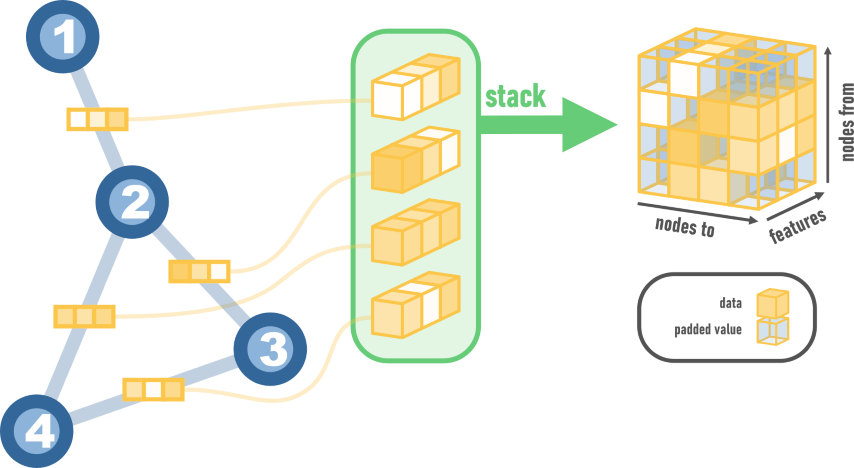

In [ ]:
caffeine_nodes = sym_caffeine_nodes.keys()
n_nodes = len(caffeine_nodes)
# We need to make sure we create the feature 3-tensor referring to the correct nodes
# This dictionary gives us a map from the node labels to indices of the 3-tensors first 2 axises
caffeine_nodes_indices = {node_idx: i for i, node_idx in enumerate(sorted(caffeine_nodes))}

caffeine_edge_features_tensor = torch.zeros((n_nodes, n_nodes, embedding_dim), dtype=BOND_TYPE_EMBEDDINGS.dtype)

for edge_idx, encoded_edge_features in enc_caffeine_edges.items():
  encoded_atom_type = encoded_edge_features['bond_type']
  embedded_edge_features = {'bond_type': embedded_atom_type}
  embedded_caffeine_edges[edge_idx] = embedded_edge_features

for (node_u, node_v), features in embedded_caffeine_edges.items():
  # Can you explain the reason for the two lines below?
  node_u_idx = caffeine_nodes_indices[node_u]
  node_v_idx = caffeine_nodes_indices[node_v]
  caffeine_edge_features_tensor[node_u_idx, node_v_idx] = features['bond_type']

````{exercise} Question
 In the code block above, what is the reason for creating `node_u_idx` and `node_v_idx`?
````

We can't just use the node id's as indices to our graph, since we don't know if they correspond to the same order as the features of our nodes. We create an indirection instead where we index the nodes in the same order as the nodes (the `sorted` order).

In [ ]:
PADDED_BOND_TYPES = {None: 0, 'S': 1, 'D': 2, 'A': 3}
num_embeddings = len(PADDED_BOND_TYPES)
embedding_dim = 16  # This is a hyper parameter, you can set it to whatever value you like (though 1 will work poorly)
PADDED_BOND_TYPE_EMBEDDINGS = torch.randn((num_embeddings, embedding_dim))
pad_idx = PADDED_BOND_TYPES[None]
PADDED_BOND_TYPE_EMBEDDINGS[pad_idx] = 0  # This is important. Why do you think that is?

padded_enc_caffeine_edges = {}
for edge, edge_attributes in sym_caffeine_edges.items():
  sym_bond_type = edge_attributes['bond_type']
  encoded_bond_type = PADDED_BOND_TYPES[sym_bond_type]
  padded_enc_caffeine_edges[edge] = {'bond_type': encoded_bond_type}

````{exercise} Question
 Why do you think we added a `None` value in the code above?
````
The None value  will act as a padding value. The corresponding embedding will be the zero-vector.

In [ ]:
caffeine_edge_encoded_tensor = torch.zeros((n_nodes, n_nodes), dtype=torch.long)

for (node_u, node_v), features in padded_enc_caffeine_edges.items():
  # Can you explain the reason for the two lines below?
  node_u_idx = caffeine_nodes_indices[node_u]
  node_v_idx = caffeine_nodes_indices[node_v]
  encoded_value = features['bond_type']
  # We explicitly set both directions here, forcing an undirected graph. A more
  # general way would be to encode the undirectedness in the edge input instead, 
  # having both direction explictly represented in the sym_caffeine_edges dict
  caffeine_edge_encoded_tensor[node_u_idx, node_v_idx] = encoded_value
  caffeine_edge_encoded_tensor[node_v_idx, node_u_idx] = encoded_value
caffeine_edge_encoded_tensor

tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]])

In [ ]:
caffeine_embedded_edge_features = PADDED_BOND_TYPE_EMBEDDINGS[caffeine_edge_encoded_tensor]
caffeine_embedded_edge_features

tensor([[[ 0.6888,  1.2198,  0.1651,  ...,  1.2464,  1.1707,  1.5525],
         [ 0.3349,  1.6689, -0.7345,  ...,  1.0846,  1.5738,  0.5577],
         [ 0.6888,  1.2198,  0.1651,  ...,  1.2464,  1.1707,  1.5525],
         ...,
         [ 0.6888,  1.2198,  0.1651,  ...,  1.2464,  1.1707,  1.5525],
         [ 0.6888,  1.2198,  0.1651,  ...,  1.2464,  1.1707,  1.5525],
         [ 0.6888,  1.2198,  0.1651,  ...,  1.2464,  1.1707,  1.5525]],

        [[ 0.3349,  1.6689, -0.7345,  ...,  1.0846,  1.5738,  0.5577],
         [ 0.6888,  1.2198,  0.1651,  ...,  1.2464,  1.1707,  1.5525],
         [ 0.3349,  1.6689, -0.7345,  ...,  1.0846,  1.5738,  0.5577],
         ...,
         [ 0.6888,  1.2198,  0.1651,  ...,  1.2464,  1.1707,  1.5525],
         [ 0.3349,  1.6689, -0.7345,  ...,  1.0846,  1.5738,  0.5577],
         [ 0.6888,  1.2198,  0.1651,  ...,  1.2464,  1.1707,  1.5525]],

        [[ 0.6888,  1.2198,  0.1651,  ...,  1.2464,  1.1707,  1.5525],
         [ 0.3349,  1.6689, -0.7345,  ...,  1

## Multiple features

We've currently limited ourselves to a single variable per node and edge, but for graphs we often have multiple (e.g. user age and country of residence).

We're going to build a pipeline to handle this. If we just extend what we've done so far it can be a bit messy, so we'll use classes to organize the pipeline. Below is a figure which illustrates this pipeline.

The pipeline shows the transformations we will do for a single node and its features. In this case, the node has 4 different attributes, two are _categorical_, represented by strings, and two are numerical represented by floating point numbers.

What the pipeline highlights is that we need to handle each feature seperately. Categorical features must first be mapped to a integer index like we showed above, and then embedded with a _dedicated_ embedding layer. Here we combine the embedded features using a sum.

Numerical data might instead be preprocessed (e.g. log-transformed) in a separate preprocessing step. Note that we don't sum the numerical features like we do with the embeddings.



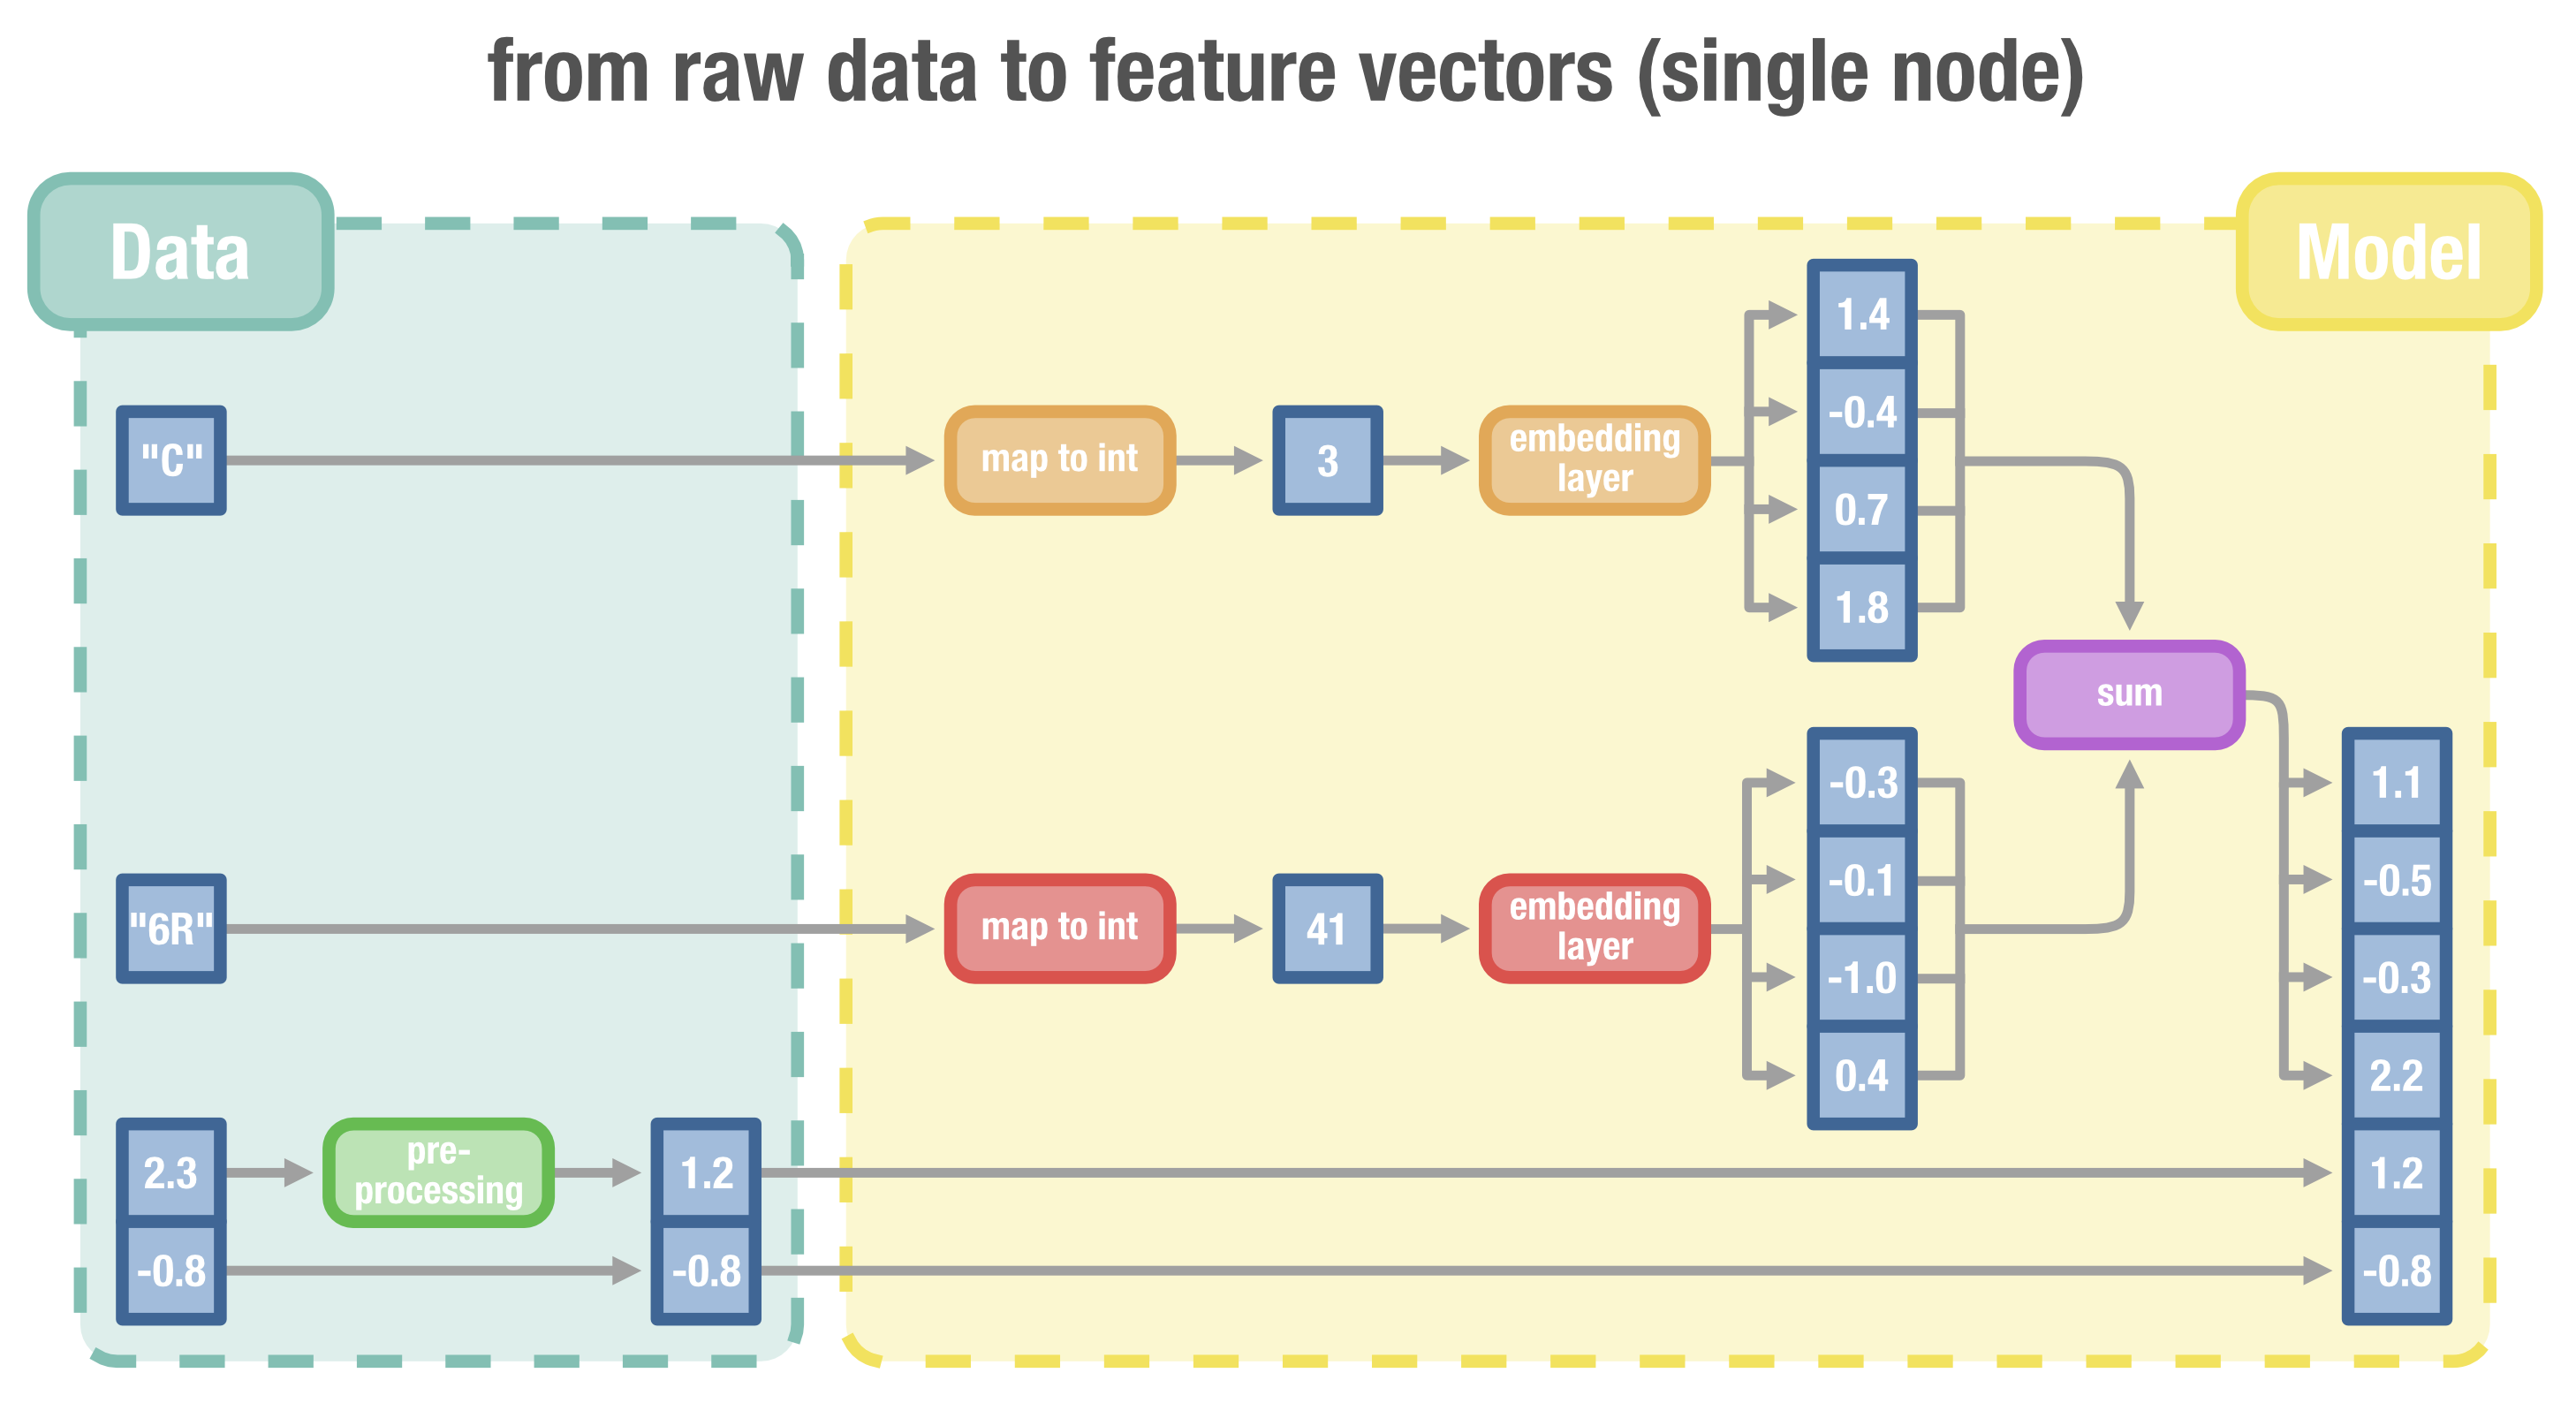

### Feature book keeping

Consider this code fragment: 
```python
enc_caffeine_nodes = {}
for node_idx, node_attributes in sym_caffeine_nodes.items():
  sym_atom_type = node_attributes['atom_type']
  encoded_atom_type = ATOM_TYPES[sym_atom_type]
  enc_caffeine_nodes[node_idx] = {'atom_type': encoded_atom_type}
```

This code takes a node feature and encodes it, but right now it hardcodes the node features ('atom_type') and the encoding dictionary (ATOM_TYPES) for the symbolic features. We're going to encapsulate these values inside a class, which will essentally act as a _type_ for our features. This class will be used instead of the string key we've used to build our features, allowing us to always have access to the feature metadata we need.

Below we introduce a `ContinuousVariable` and `CategoricalVariable`. The first one is essentially just there for completeness sake, the important one is the categorical variable.

````{exercise} Question
 look at the `CategoricalVariable` class below. What is the purpose of the argument `add_null_value`?
````

Hint: Have a look at the `PADDED_BOND_TYPES` above, what did we do there and why?

````{solution}

The null value adds support for a value which is None, and can be used to tell downstreams code that we should have support for a zero-vector (or padding value). This is commonly used when we have batches of unevenly sized data. The "invalid" places in that batch will be assigned the zero vector as their embeddings. 
````

In [ ]:
class ContinuousVariable:
  def __init__(self, name):
    self.name = name

  def __repr__(self):
    return f'<ContinuousFeature: {self.name}>'

  def __eq__(self, other):
    return self.name == other.name

  def __hash__(self):
    return hash(self.name)


class CategoricalVariable:
  def __init__(self, name, values, add_null_value=True):
    self.name = name
    self.has_null_value = add_null_value
    if self.has_null_value:
      self.null_value = None
      values = (None,) + tuple(values)
    self.values = tuple(values)
    self.value_to_idx_mapping = {v: i for i, v in enumerate(values)}
    self.inv_value_to_idx_mapping = {i: v for v, i in
                                     self.value_to_idx_mapping.items()}
    
    if self.has_null_value:
      self.null_value_idx = self.value_to_idx_mapping[self.null_value]
  
  def get_null_idx(self):
    if self.has_null_value:
      return self.null_value_idx
    else:
      raise RuntimeError(f"Categorical variable {self.name} has no null value")

  def value_to_idx(self, value):
    return self.value_to_idx_mapping[value]
  
  def idx_to_value(self, idx):
    return self.inv_value_to_idx_mapping[idx]
  
  def __len__(self):
    return len(self.values)
  
  def __repr__(self):
    return f'<CategoricalFeature: {self.name}>'

  def __eq__(self, other):
    return self.name == other.name and self.values == other.values

  def __hash__(self):
    return hash((self.name, self.values))

You might be wandering what all the extra methods do (`__hash__` and `__eq__` in particular). They are there to allow us to compare objects of these classes with each others in meaningful ways. This is not directly relevant to the workshop, but makes these objects behave as intendend even if they are copied when we use multiprocessing

In [ ]:
# We create two different instances of the variable, but with the same content
a = CategoricalVariable('foo', [1,2,3])
b = CategoricalVariable('foo', [1,2,3])
# If we didn't implement __eq__ and __hash__, the `is` operator would be used 
# for key lookups in dictionaries
print("a is b?", a is b) 
print("a == b?", a == b)
foo_dict = {a: 'bar'}
# Without __hash__, the dict access below would give a KeyError
print('foo_dict[b] ==\'{}\''.format(foo_dict[b]))

a is b? False
a == b? True
foo_dict[b] =='bar'


### Encoding multiple attributes per node and edge

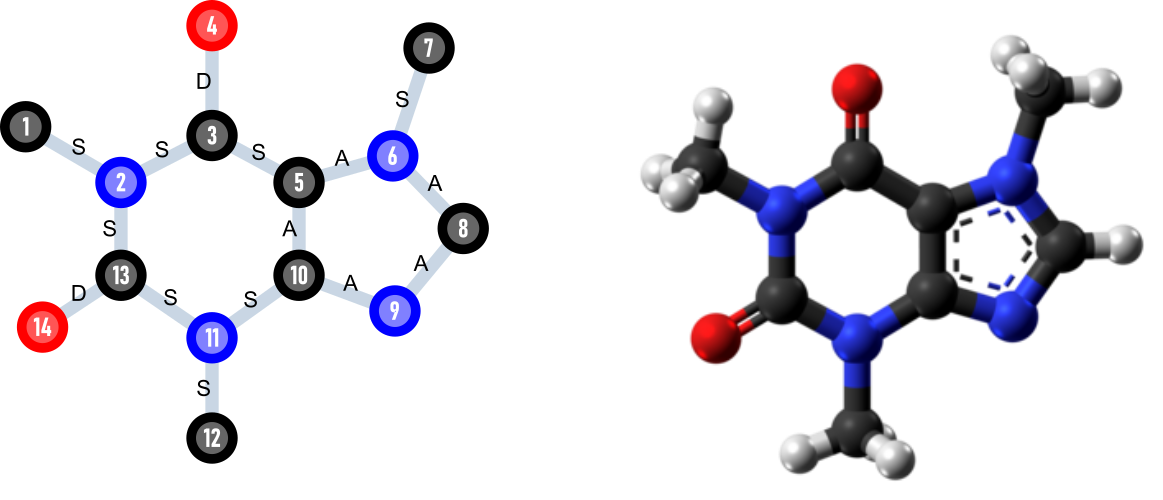

In [ ]:
ATOM_TYPE_VARIABLE = CategoricalVariable('atom_type', ['C', 'N', 'O'])
# Is aromatic is just True if the atom is part of an aromatic ring
ATOM_IS_AROMATIC_VARIABLE = CategoricalVariable('is_aromatic', [True, False])
ATOM_HYDROGENS_VARIABLE = ContinuousVariable('num_hydrogens')
ATOM_VARIABLES = [ATOM_TYPE_VARIABLE, ATOM_IS_AROMATIC_VARIABLE, ATOM_HYDROGENS_VARIABLE]

caffeine_nodes = {1: {ATOM_TYPE_VARIABLE: 'C', ATOM_IS_AROMATIC_VARIABLE: False, ATOM_HYDROGENS_VARIABLE: 3},
                      2: {ATOM_TYPE_VARIABLE: 'N', ATOM_IS_AROMATIC_VARIABLE: False, ATOM_HYDROGENS_VARIABLE: 0},
                      3: {ATOM_TYPE_VARIABLE: 'C', ATOM_IS_AROMATIC_VARIABLE: False, ATOM_HYDROGENS_VARIABLE: 0},
                      4: {ATOM_TYPE_VARIABLE: 'O', ATOM_IS_AROMATIC_VARIABLE: False, ATOM_HYDROGENS_VARIABLE: 0},
                      5: {ATOM_TYPE_VARIABLE: 'C', ATOM_IS_AROMATIC_VARIABLE: True, ATOM_HYDROGENS_VARIABLE: 0},
                      6: {ATOM_TYPE_VARIABLE: 'N', ATOM_IS_AROMATIC_VARIABLE: True, ATOM_HYDROGENS_VARIABLE: 0},
                      7: {ATOM_TYPE_VARIABLE: 'C', ATOM_IS_AROMATIC_VARIABLE: False, ATOM_HYDROGENS_VARIABLE: 3},
                      8: {ATOM_TYPE_VARIABLE: 'C', ATOM_IS_AROMATIC_VARIABLE: True, ATOM_HYDROGENS_VARIABLE: 1},
                      9: {ATOM_TYPE_VARIABLE: 'N', ATOM_IS_AROMATIC_VARIABLE: True, ATOM_HYDROGENS_VARIABLE: 0},
                      10: {ATOM_TYPE_VARIABLE: 'C', ATOM_IS_AROMATIC_VARIABLE: True, ATOM_HYDROGENS_VARIABLE: 0},
                      11: {ATOM_TYPE_VARIABLE: 'N', ATOM_IS_AROMATIC_VARIABLE: False, ATOM_HYDROGENS_VARIABLE: 0},
                      12: {ATOM_TYPE_VARIABLE: 'C', ATOM_IS_AROMATIC_VARIABLE: False, ATOM_HYDROGENS_VARIABLE: 3},
                      13: {ATOM_TYPE_VARIABLE: 'C', ATOM_IS_AROMATIC_VARIABLE: False, ATOM_HYDROGENS_VARIABLE: 0},
                      14: {ATOM_TYPE_VARIABLE: 'O', ATOM_IS_AROMATIC_VARIABLE: False, ATOM_HYDROGENS_VARIABLE: 0}}

BOND_TYPES_VARIABLE = CategoricalVariable('bond_type', ('S', 'D', 'A'))
BOND_IS_AROMATIC_VARIABLE = CategoricalVariable('is_aromatic', (True, False))
BOND_VARIABLES = [BOND_TYPES_VARIABLE, BOND_IS_AROMATIC_VARIABLE]
caffeine_edges = {frozenset({1,2}): {BOND_TYPES_VARIABLE: 'S', BOND_IS_AROMATIC_VARIABLE: False},
                  frozenset({2,3}): {BOND_TYPES_VARIABLE: 'S', BOND_IS_AROMATIC_VARIABLE: False},
                  frozenset({2,13}): {BOND_TYPES_VARIABLE: 'S', BOND_IS_AROMATIC_VARIABLE: False},
                  frozenset({3,4}): {BOND_TYPES_VARIABLE: 'D', BOND_IS_AROMATIC_VARIABLE: False},
                  frozenset({3,5}): {BOND_TYPES_VARIABLE: 'S', BOND_IS_AROMATIC_VARIABLE: False},
                  frozenset({5,6}): {BOND_TYPES_VARIABLE: 'A', BOND_IS_AROMATIC_VARIABLE: True},
                  frozenset({5,10}): {BOND_TYPES_VARIABLE: 'A', BOND_IS_AROMATIC_VARIABLE: True},
                  frozenset({6,7}): {BOND_TYPES_VARIABLE: 'S', BOND_IS_AROMATIC_VARIABLE: False},
                  frozenset({6,8}): {BOND_TYPES_VARIABLE: 'A', BOND_IS_AROMATIC_VARIABLE: True},
                  frozenset({8,9}): {BOND_TYPES_VARIABLE: 'A', BOND_IS_AROMATIC_VARIABLE: True},
                  frozenset({9,10}): {BOND_TYPES_VARIABLE: 'A', BOND_IS_AROMATIC_VARIABLE: True},
                  frozenset({10,11}): {BOND_TYPES_VARIABLE: 'S', BOND_IS_AROMATIC_VARIABLE: False},
                  frozenset({11,12}): {BOND_TYPES_VARIABLE: 'S', BOND_IS_AROMATIC_VARIABLE: False},
                  frozenset({11,13}): {BOND_TYPES_VARIABLE: 'S', BOND_IS_AROMATIC_VARIABLE: False},
                  frozenset({13,14}): {BOND_TYPES_VARIABLE: 'D', BOND_IS_AROMATIC_VARIABLE: False}}


### Per-variable Embeddings

This might seem like a complication, but the neat thing is that these datastructure now carries around the information we need about how to encode the symbolic values to integer, as well as how many levels the categorical variables have, which we need to create the embeddings.

To create the embeddings, we first seperate the continuous variables from the categorical ones

In [ ]:
CATEGORICAL_ATOM_VARIABLES = [var for var in ATOM_VARIABLES if isinstance(var, CategoricalVariable)]
CONTINUOUS_ATOM_VARIABLES = [var for var in ATOM_VARIABLES if isinstance(var, ContinuousVariable)]

CATEGORICAL_BOND_VARIABLES = [var for var in BOND_VARIABLES if isinstance(var, CategoricalVariable)]
CONTINUOUS_BOND_VARIABLES = [var for var in BOND_VARIABLES if isinstance(var, ContinuousVariable)]
  

In [ ]:
from torch.nn import Embedding

def make_embedding(var, embedding_dim):
  num_embeddings = len(var)
  if var.has_null_value:
    pad_idx = var.get_null_idx()
    embedding = Embedding(num_embeddings, embedding_dim, padding_idx=pad_idx)
  else:
    embedding = Embedding(num_embeddings, embedding_dim)
  return embedding


In [ ]:
embedding_dim = 16 # This is a hyper parameter

ATOM_EMBEDDINGS = { var:make_embedding(var, embedding_dim) for var in CATEGORICAL_ATOM_VARIABLES }
BOND_EMBEDDINGS = { var: make_embedding(var, embedding_dim) for var in CATEGORICAL_BOND_VARIABLES }

In [ ]:
ATOM_EMBEDDINGS

{<CategoricalFeature: atom_type>: Embedding(4, 16, padding_idx=0),
 <CategoricalFeature: is_aromatic>: Embedding(3, 16, padding_idx=0)}

### Stacking encoded features for multiple variables

Now we have torch.nn.Embeddings associated with our categorical variables. We use them similarlily to what we did before, but first let's stack our features.

We no longer have a single variable, so have to make the code a bit more general

In [ ]:
stacked_encoded_categorical_node_features = {var: [] for var in CATEGORICAL_ATOM_VARIABLES}
stacked_continuous_node_features = {var: [] for var in CONTINUOUS_ATOM_VARIABLES}

for node_idx, features in sorted(caffeine_nodes.items()):
  for var in CATEGORICAL_ATOM_VARIABLES:
    symbolic_value = features[var]
    encoded_value = var.value_to_idx(symbolic_value)
    stacked_encoded_categorical_node_features[var].append(encoded_value)
  for var in CONTINUOUS_ATOM_VARIABLES:
    value = features[var]
    stacked_continuous_node_features[var].append(value)

stacked_encoded_categorical_node_features, stacked_continuous_node_features

({<CategoricalFeature: atom_type>: [1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3],
  <CategoricalFeature: is_aromatic>: [2,
   2,
   2,
   2,
   1,
   1,
   2,
   1,
   1,
   1,
   2,
   2,
   2,
   2]},
 {<ContinuousFeature: num_hydrogens>: [3,
   0,
   0,
   0,
   0,
   0,
   3,
   1,
   0,
   0,
   0,
   3,
   0,
   0]})

In [ ]:
n_nodes = len(caffeine_nodes)
caffeine_nodes_indices = {node_idx: i for i, node_idx in enumerate(sorted(caffeine_nodes.keys()))}


stacked_encoded_categorical_edge_features = {}
stacked_continuous_edge_features = {}

for var in CATEGORICAL_BOND_VARIABLES:
  pairwise_tensor = torch.zeros((n_nodes, n_nodes), dtype=torch.long)
  for (node_u, node_v), features in caffeine_edges.items():
    node_u_idx = caffeine_nodes_indices[node_u]
    node_v_idx = caffeine_nodes_indices[node_v]
    symbolic_value = features[var]
    encoded_value = var.value_to_idx(symbolic_value)
    pairwise_tensor[node_u_idx, node_v_idx] = encoded_value
    pairwise_tensor[node_v_idx, node_u_idx] = encoded_value
  stacked_encoded_categorical_edge_features[var] = pairwise_tensor


for var in CONTINUOUS_BOND_VARIABLES:
  pairwise_tensor = torch.zeros((n_nodes, n_nodes), dtype=torch.float32)
  for (node_u, node_v), features in caffeine_edges.items():
    node_u_idx = caffeine_nodes_indices[node_u]
    node_v_idx = caffeine_nodes_indices[node_v]
    value = features[var]
    pairwise_tensor[node_u_idx, node_v_idx] = value
    pairwise_tensor[node_v_idx, node_u_idx] = value
  stacked_encoded_categorical_edge_features[var] = pairwise_tensor

stacked_encoded_categorical_edge_features, stacked_continuous_edge_features

({<CategoricalFeature: bond_type>: tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
          [0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0],
          [0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
          [0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]]),
  <CategoricalFeature: is_aromatic>: tensor([[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
          [0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0

### Embedding the stacked and encoded features

We're now ready to embed these variables. We have the embeddings created, and will just run them over the corresponding variables



In [ ]:
embedded_node_features = dict()
for var, encoded_features in stacked_encoded_categorical_node_features.items():
  tensor_features = torch.tensor(encoded_features, dtype=torch.long)
  embedding = ATOM_EMBEDDINGS[var]
  embedded_features = embedding(tensor_features)
  embedded_node_features[var] = embedded_features

continuous_node_features = dict()
for var, features in stacked_continuous_node_features.items():
  continuous_node_features[var] = torch.tensor(features, dtype=torch.float32)

#embedded_node_features, continuous_node_features

In [ ]:
embedded_edge_features = dict()
for var, encoded_features in stacked_encoded_categorical_edge_features.items():
  tensor_features = torch.tensor(encoded_features, dtype=torch.long)
  embedding = BOND_EMBEDDINGS[var]
  embedded_features = embedding(tensor_features)
  embedded_edge_features[var] = embedded_features

continuous_edge_features = dict()
for var, features in stacked_continuous_edge_features.items():
  continuous_edge_features[var] = torch.tensor(features, dtype=torch.float32)

#embedded_edge_features, continuous_edge_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


### Combining the embedded and continuous features

To finally wrap up, we aggregate these features by first summing the embedded features and then concatenating the continuous ones.

In [ ]:
stacked_node_embeddings = torch.stack(tuple(embedded_node_features.values()))
aggregated_node_embeddings = torch.sum(stacked_node_embeddings, dim=0)
continuous_node_features_stacked = torch.stack(tuple(continuous_node_features.values()), dim=-1)  # We stack the continuous features in the other dimension
node_features = torch.concat([aggregated_node_embeddings, continuous_node_features_stacked], dim=-1)

In [ ]:
stacked_edge_embeddings = torch.stack(tuple(embedded_edge_features.values()))
edge_features = torch.sum(stacked_edge_embeddings, dim=0)
# In this example we don't have any continuous edge features, so the code below would throw an error
#continuous_edge_features_stacked = torch.stack(tuple(continuous_edge_features.values()), dim=-1)  # We stack the continuous features in the other dimension
#edge_features = torch.concat([aggregated_edge_embeddings, continuous_edge_features_stacked], dim=-1)

We've now gone through all the steps necessary to create a single feature vector for each node and edge like.

````{exercise} Question
 Can you identify the code above for each of the different processing blocks (non-blue) below (apart from pre-processing)?
````

Note that the figure does not illustrate this specific case, but is a more general depiction of the process we've gone through.



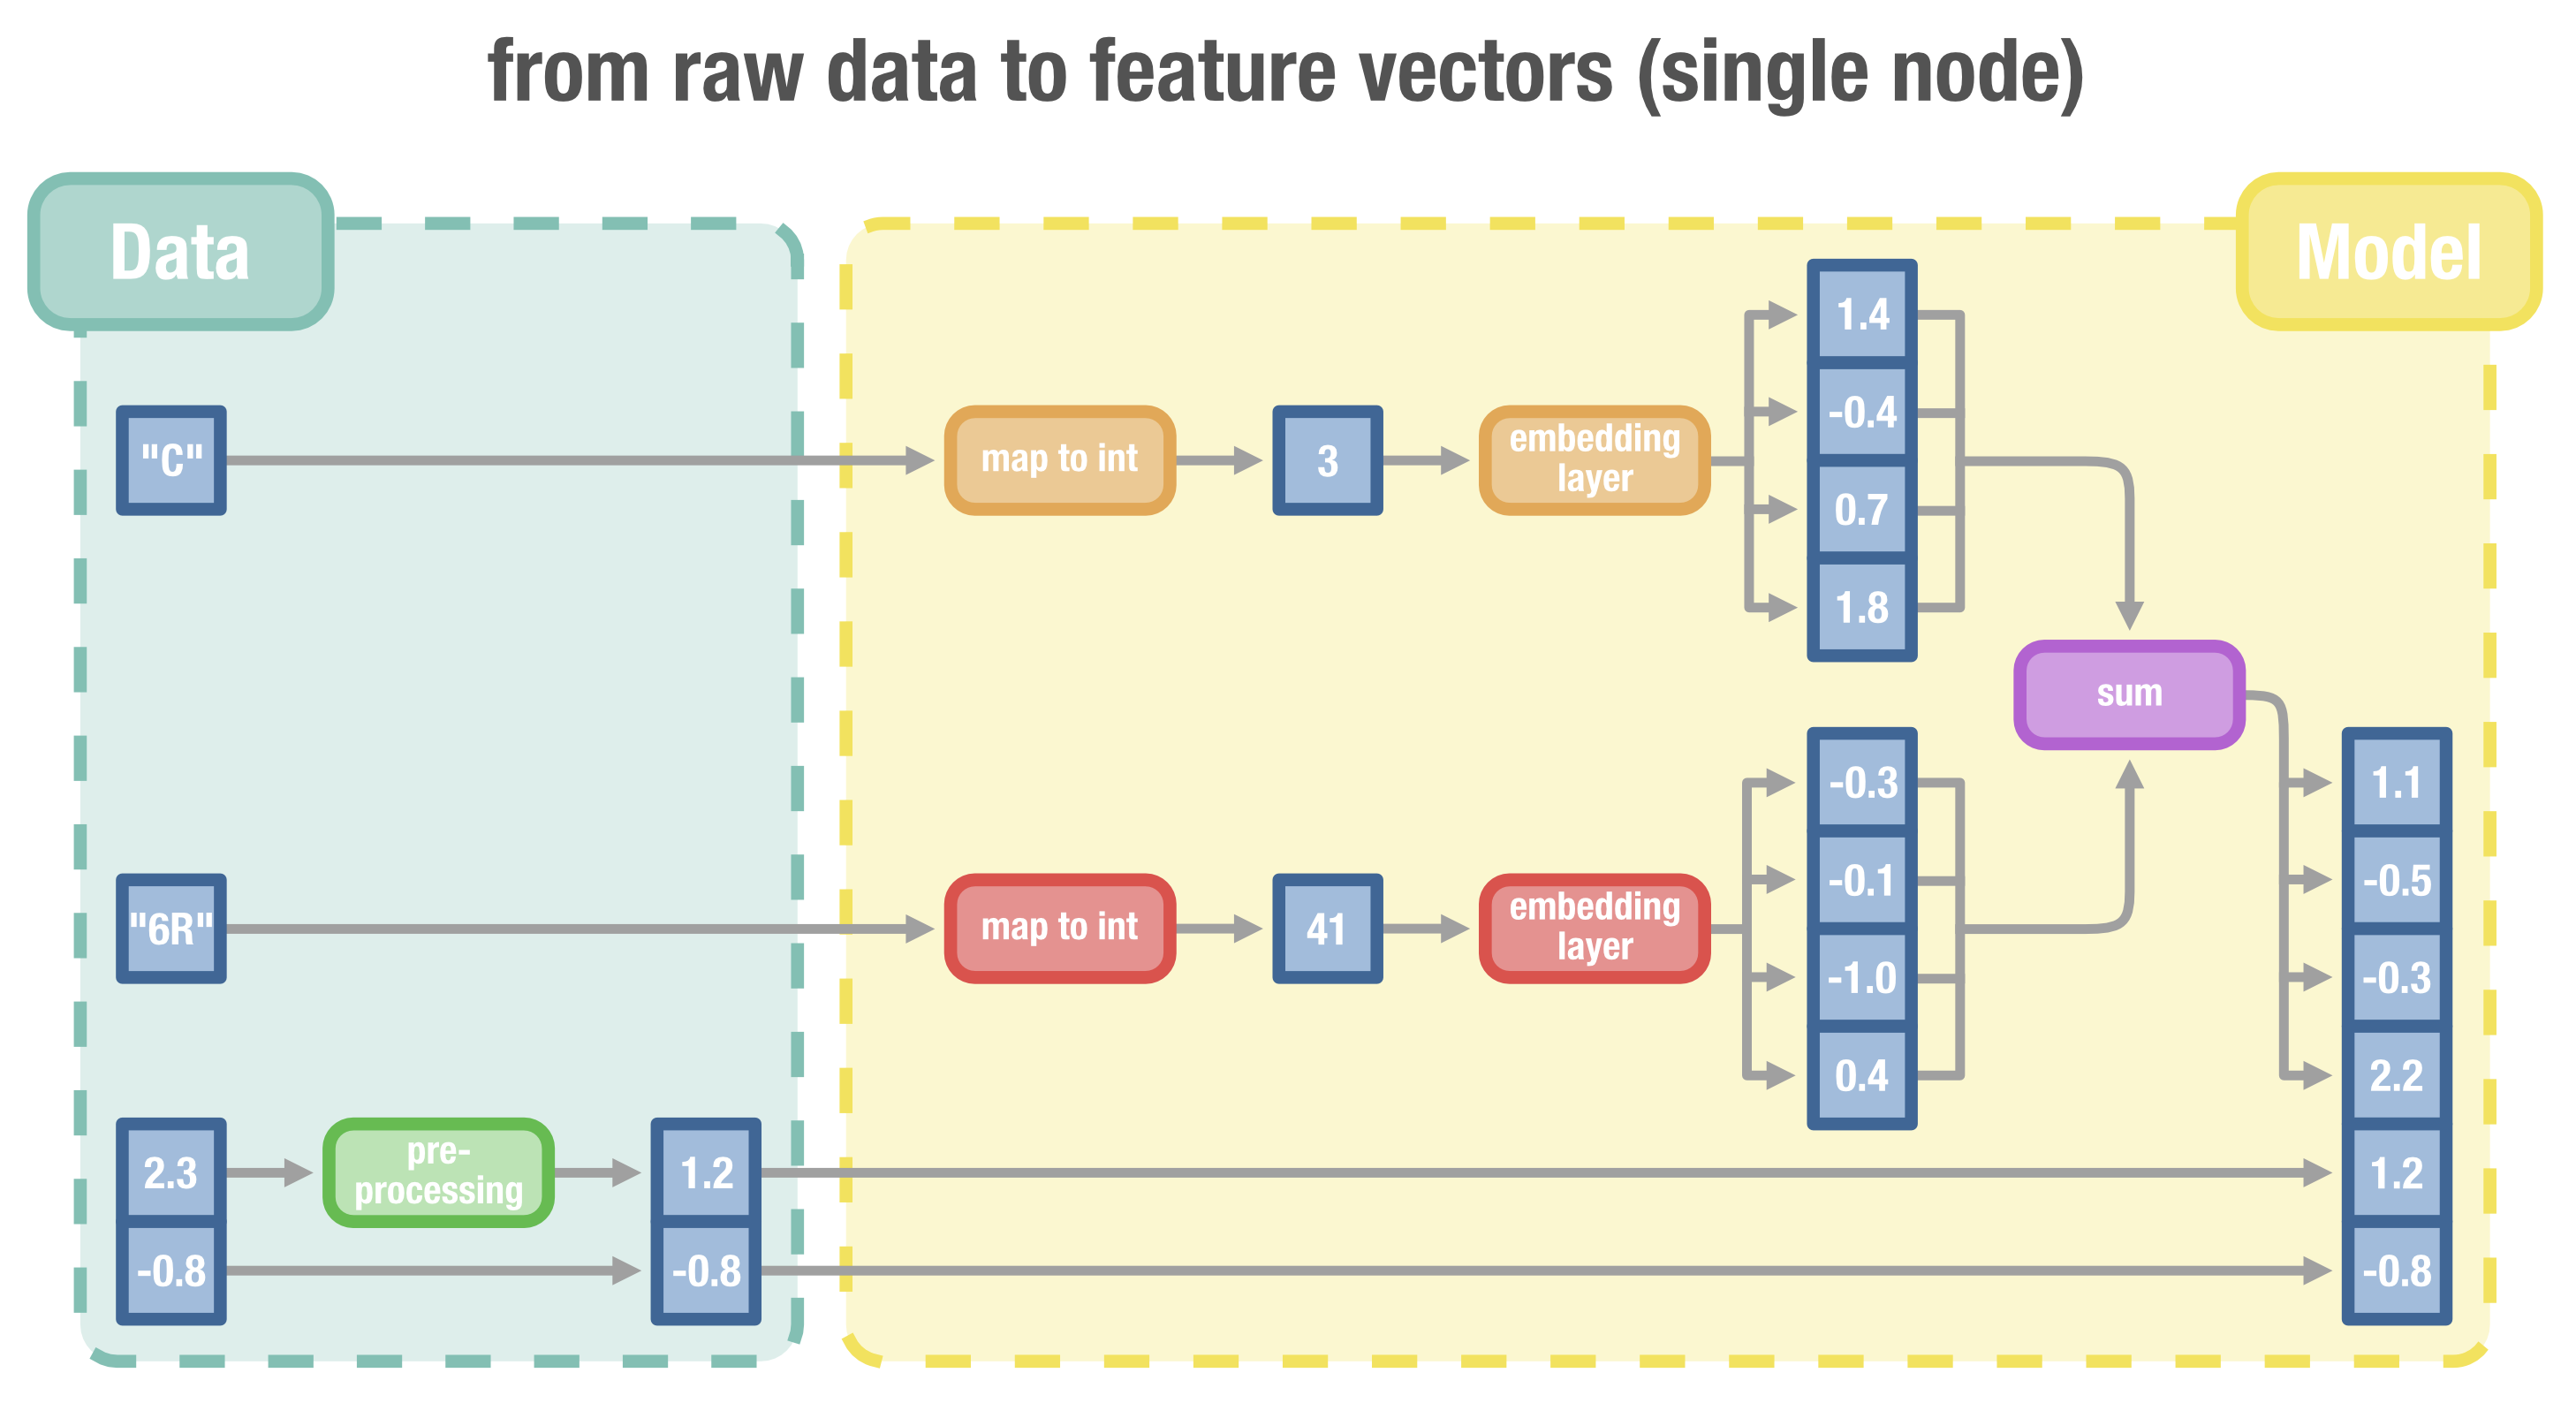

## Wrapping up

This has been quite the jurney, but we've gone through the arduous process of first encoding graphs in clear python objects and then dived into how to model node and edge attributes. We looked at how these attributes needs to be treated seperately if they are categorical, and how we can use embeddings to represent the levels of the categorical variable as dense vectors suitable for inputs to a neural network.
 We also looked at how we might combine multiple attributes per node and edge, and how this requires us to keep track of the possible levels of the different variables as well as seperate `Embeddings` for them.

 Important concepts:
  - Adjacency matrix
  - Categorical variable
  - Embedding
  - Symbolic to integer index mapping
  - Padding value
  - Permutation invariance